In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import plotly.graph_objects as go
from matplotlib import rcParams
from scipy import stats
rcParams['axes.titlepad'] = 20 



In [3]:
error_category_df = pd.read_csv('data/Category-Total.csv', delimiter=';')
error_type_df = pd.read_csv('data/Type-Total.csv', delimiter=';')

In [4]:
error_category_df['Q1']=error_category_df['Q1'].fillna('Absent').apply(lambda x: x.split("|")[0].strip(' '))
error_category_df['Q2']=error_category_df['Q2'].fillna('Absent').apply(lambda x: x.split("|")[0].strip(' '))
error_category_df['Q3']=error_category_df['Q3'].fillna('Absent').apply(lambda x: x.split("|")[0].strip(' '))
error_category_df['Q4']=error_category_df['Q4'].fillna('Absent').apply(lambda x: x.split("|")[0].strip(' '))
error_category_df['Schema']=error_category_df['Schema'].fillna('0')
error_category_df['Properties']=error_category_df['Properties'].fillna('0')
error_category_df['Q6']=error_category_df['Q6'].fillna('Absent').apply(lambda x: x.split("|")[0].strip(' '))
error_category_df['Q7']=error_category_df['Q7'].fillna('Absent').apply(lambda x: x.split("|")[0].strip(' '))
error_category_df['Q8']=error_category_df['Q8'].fillna('Absent').apply(lambda x: x.split("|")[0].strip(' '))
error_category_df['Q9']=error_category_df['Q9'].fillna('Absent').apply(lambda x: x.split("|")[0].strip(' '))
error_category_df['Q10']=error_category_df['Q10'].fillna('Absent').apply(lambda x: x.split("|")[0].strip(' '))
error_category_df['Q11']=error_category_df['Q11'].fillna('Absent').apply(lambda x: x.split("|")[0].strip(' '))
error_category_df['Q12']=error_category_df['Q12'].fillna('Absent').apply(lambda x: x.split("|")[0].strip(' '))
error_category_df['Q13']=error_category_df['Q13'].fillna('Absent').apply(lambda x: x.split("|")[0].strip(' '))
error_category_df['Q14']=error_category_df['Q14'].fillna('Absent').apply(lambda x: x.split("|")[0].strip(' '))
error_category_df['Q15']=error_category_df['Q15'].fillna('Absent').apply(lambda x: x.split("|")[0].strip(' '))
error_category_df.head()

,TEST ID,consent,What language can you program in? (List the different languages separated by a comma),"How do you rate your knowledge of relational databases (e.g., MySQL))?(1 = never heard of it, 5 = can use it in a professional environment)","How do you rate your knowledge of NoSQL databases (e.g., MongoDB, Cassandra)?(1 = never heard of it, 5 = can use it in a professional environment)",Which one in particular?,"How do you rate your knowledge of other graph structures beside property graphs (e.g., RDF and SPARQL)?(1 = never heard of it, 5 = can use it in a professional environment)",Are you knowledgable of any of the following graph query languages?,Q1,Q2,...,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15
0,student-0,Accept,"Python,java, C ,Dart",4,4,"MongoDB, InfluxDB",3,OpenCypher,Complication,Complication,...,Semantic Return,Complication,"Semantic Pattern, Semantic Where, Semantic Return","Semantic Pattern, Semantic Return",Semantic Where,Absent,Absent,Absent,Absent,Absent
1,student-1,Accept,"c++, java, python, prolog/datalog, js",3,1,"InfluxDB, Other",1,NaN,Correct,Correct,...,Complication,Complication,"Semantic Pattern, Semantic Where",Correct,"Semantic Where, Semantic Pattern",Absent,Absent,Absent,Absent,Absent
2,student-2,Accept,Python,3,3,MongoDB,2,"OpenCypher, SQL/PGQ",Correct,Complication,...,Semantic Return,Semantic Return,"Semantic Pattern, Semantic Where, Semantic Return","Semantic Where, Semantic Return",Semantic Where,Absent,Absent,Absent,Absent,Absent
3,student-3,Accept,"Python, JavaScript",3,1,Other,1,NaN,Correct,Correct,...,Complication,Complication,"Semantic Pattern, Semantic Where, Semantic Return",Correct,Semantic Where,Absent,Absent,Absent,Absent,Absent
4,student-4,Accept,"Python, java, scala, R",4,4,"MongoDB, Other",3,OpenCypher,Correct,Complication,...,Semantic Return,Complication,"Semantic Pattern, Semantic Where, Semantic Return",Semantic Where,Semantic Where,Absent,Absent,Absent,Absent,Absent


In [5]:
error_category_df.shape

(59, 25)

In [6]:
melted_error_category_df = error_category_df[['Q1','Q2','Q3','Q4','Q6','Q7','Q8','Q9','Q10','Q11','Q12','Q13','Q14','Q15']].melt( var_name='Query', value_name='Label')
melted_error_category_df=melted_error_category_df.fillna('Absent')

melted_error_category_df['Label'] =melted_error_category_df['Label'].str.split(',')

# Explode the DataFrame to create new rows
melted_error_category_df = melted_error_category_df.explode('Label')
melted_error_category_df['Label'] = melted_error_category_df['Label'].apply(lambda x: x.strip(' '))
# Display the resulting DataFrame
label_counts = melted_error_category_df['Label'].value_counts()

print(label_counts)

Label
Absent              340
Correct             171
Semantic Return     111
Complication         94
Semantic Where       85
Semantic Pattern     84
Other                18
No Answer            15
SyntaxError           6
Name: count, dtype: int64


In [7]:
error_type_df.head()

,TEST ID,consent,What language can you program in? (List the different languages separated by a comma),"How do you rate your knowledge of relational databases (e.g., MySQL))?(1 = never heard of it, 5 = can use it in a professional environment)","How do you rate your knowledge of NoSQL databases (e.g., MongoDB, Cassandra)?(1 = never heard of it, 5 = can use it in a professional environment)",Which one in particular?,"How do you rate your knowledge of other graph structures beside property graphs (e.g., RDF and SPARQL)?(1 = never heard of it, 5 = can use it in a professional environment)",Are you knowledgable of any of the following graph query languages?,Q1,Q2,...,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15
0,student-0,Accept,"Python,java, C ,Dart",4,4,"MongoDB, InfluxDB",3,OpenCypher,"Added Collect, Added Unwind, Added With","Added With, Added Collect",...,Missing Distinct,Added Collect in return shape,"Wrong Property, Wrong Information, Wrong Pattern","Additional node, Wrong information",Missing Condition,NaN,NaN,NaN,NaN,NaN
1,student-1,Accept,"c++, java, python, prolog/datalog, js",3,1,"InfluxDB, Other",1,NaN,NaN,NaN,...,Added Collect in return shape,Added Collect in return shape,"Additional Node, Wrong Edge Direction, Missi...",NaN,"Missing Condition, Missing Information",NaN,NaN,NaN,NaN,NaN
2,student-2,Accept,Python,3,3,MongoDB,2,"OpenCypher, SQL/PGQ",NaN,Added With,...,Missing Distinct,Missing Distinct,"Wrong Pattern, Wrong Property, Missing Distinct","Missing Condition, Wrong Information",Missing Condition,NaN,NaN,NaN,NaN,NaN
3,student-3,Accept,"Python, JavaScript",3,1,Other,1,NaN,NaN,NaN,...,Added Collect in return shape,Added Collect in return shape,"Wrong Property, Wrong Edge Direction, Wrong I...",NaN,Missing Condition,NaN,NaN,NaN,NaN,NaN
4,student-4,Accept,"Python, java, scala, R",4,4,"MongoDB, Other",3,OpenCypher,NaN,Added With,...,Missing Distinct,Added Collect in return shape,"Wrong Pattern, Wrong Property, Wrong Information",Missing Condition,Missing Condition,NaN,NaN,NaN,NaN,NaN


In [8]:
schema= error_category_df['Q5']
counts =schema.value_counts()
counts

Q5
0    29
1    19
2     7
3     4
Name: count, dtype: int64

In [9]:
melted_error_type_df = error_type_df[['Q1','Q2','Q3','Q4','Q6','Q7','Q8','Q9','Q10','Q11','Q12','Q13','Q14','Q15']].melt( var_name='Query', value_name='Label')
melted_error_type_df=melted_error_type_df.fillna('Absent')

melted_error_type_df['Label'] =melted_error_type_df['Label'].str.split(',')

# Explode the DataFrame to create new rows
melted_error_type_df = melted_error_type_df.explode('Label')
melted_error_type_df['Label'] = melted_error_type_df['Label'].apply(lambda x: x.strip(' '))
# Display the resulting DataFrame
label_counts = melted_error_type_df['Label'].value_counts()

print(label_counts)

Label
Absent                                                                         511
Added With                                                                      51
Missing Condition                                                               51
Added Collect                                                                   42
Missing Distinct                                                                40
Wrong Information                                                               39
Wrong Property                                                                  31
Added Unwind                                                                    27
Wrong Edge Direction                                                            27
Missing Information                                                             27
Added Collect in return shape                                                   24
Wrong Pattern                                                                   2

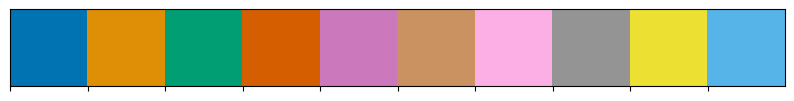

In [10]:
colorblind_palette = sns.color_palette("colorblind")
sns.palplot(colorblind_palette)

In [11]:
custom_palette = {
    'Correct': colorblind_palette[2],
    'Complication': colorblind_palette[9],
    'Other': colorblind_palette[0],
    'SyntaxError':colorblind_palette[7],
    'Semantic Return':colorblind_palette[1],
    'Semantic Where':colorblind_palette[5],
    'Semantic Pattern':colorblind_palette[3],
    'No Answer':'Black',
}

hatches =  {
    'Correct': '-',
    'Complication': '-',
    'Other': '-',
    'SyntaxError':'-',
    'Semantic Return':'/',
    'Semantic Where':'x',
    'Semantic Pattern':'o',
    'No Answer':'-',
}

# Analysis of the category of errors

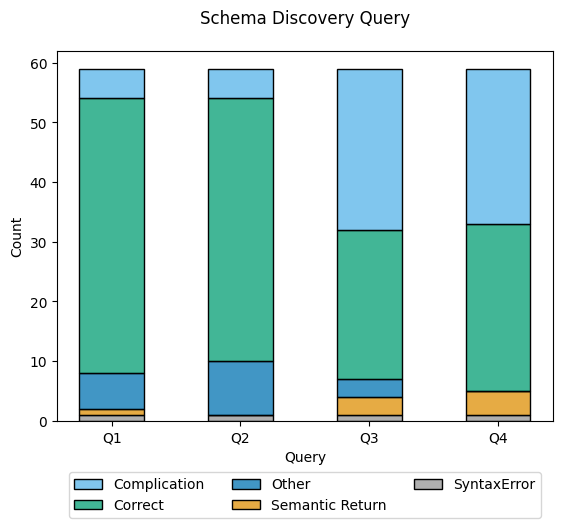

In [13]:
schema_discovery_df = error_category_df[['Q1','Q2','Q3','Q4']]
# Melting the DataFrame
melted_df = schema_discovery_df.melt( var_name='Query', value_name='Label')
# Display the resulting DataFrame
fig, ax = plt.subplots()
sns.histplot(
            data=melted_df,
            x="Query",
            hue="Label", multiple="stack",
            binwidth=.2,
              bins='auto',binrange=None, discrete=None,
            shrink=.5,
            stat="count",
            palette=custom_palette).set(title='Schema Discovery Query')
sns.move_legend(
                ax, "upper center",
                bbox_to_anchor=(.5, -0.12), ncol=3, title=None, frameon=True,
            )
plt.show()
#fig.savefig('fig/Schema_Discovery_Categories.png', bbox_inches='tight')



In [14]:
counts = melted_df.value_counts()
counts

Query  Label          
Q1     Correct            46
Q2     Correct            44
Q4     Correct            28
Q3     Complication       27
Q4     Complication       26
Q3     Correct            25
Q2     Other               9
Q1     Other               6
       Complication        5
Q2     Complication        5
Q4     Semantic Return     4
Q3     Other               3
       Semantic Return     3
Q2     SyntaxError         1
Q3     SyntaxError         1
Q1     SyntaxError         1
       Semantic Return     1
Q4     SyntaxError         1
Name: count, dtype: int64

In [15]:
analytical_part1_df = error_category_df[['Q6','Q7','Q8','Q9','Q10']]
# Melting the DataFrame
melted_df = analytical_part1_df.melt( var_name='Query', value_name='Label')

melted_df['Label'] =melted_df['Label'].str.split(',')

# Explode the DataFrame to create new rows
melted_df = melted_df.explode('Label')
melted_df['Label'] = melted_df['Label'].apply(lambda x: x.strip(' '))
# Display the resulting DataFrame
label_counts = melted_df['Label'].value_counts()

print(label_counts)
print(str(70/5) + " Absent students in the second part")

melted_df = melted_df[melted_df['Label'] != 'Absent']




Label
Absent              110
Semantic Return      88
Semantic Where       82
Semantic Pattern     63
Complication         27
Correct               9
No Answer             6
SyntaxError           2
Name: count, dtype: int64
14.0 Absent students in the second part


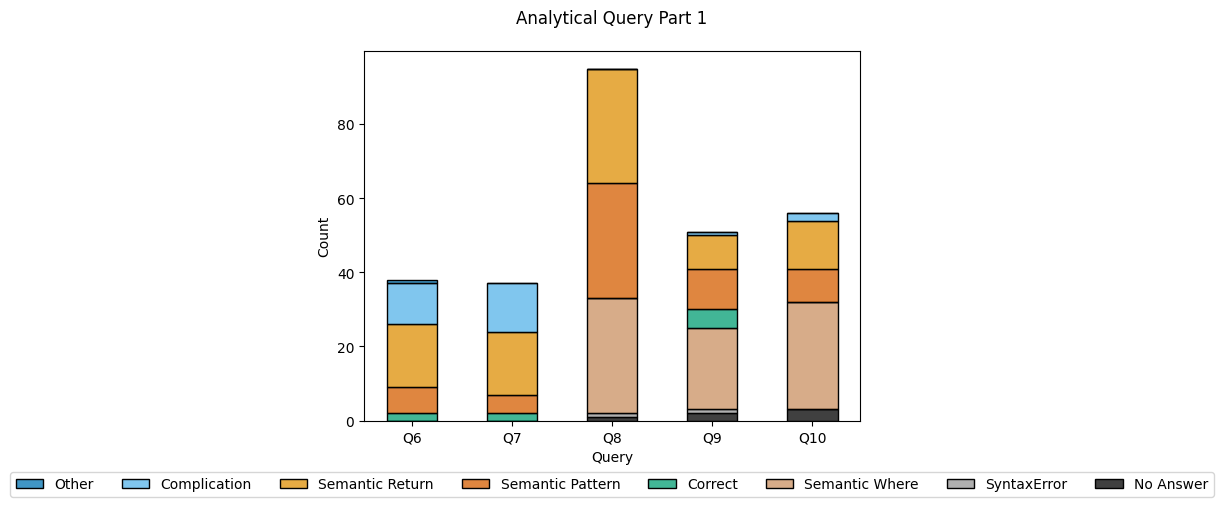

In [18]:
fig, ax = plt.subplots()
sns.histplot(
            data=melted_df,
            x="Query",
            hue="Label", multiple="stack",
            binwidth=.2,
              bins='auto',binrange=None, discrete=None,
            shrink=.5,
            
            palette=custom_palette).set(title='Analytical Query Part 1')




sns.move_legend(
                ax, "upper center",
                bbox_to_anchor=(.5, -0.12), ncol=8, title=None, frameon=True,
            )
plt.show()
#fig.savefig('fig/analytical1_Categories.png', bbox_inches='tight')

In [19]:
counts = melted_df.value_counts()
counts

Query  Label           
Q8     Semantic Where      31
       Semantic Return     31
       Semantic Pattern    31
Q10    Semantic Where      29
Q9     Semantic Where      22
Q7     Semantic Return     17
Q6     Semantic Return     17
Q7     Complication        13
Q10    Semantic Return     13
Q6     Complication        11
Q9     Semantic Pattern    11
       Semantic Return      9
Q10    Semantic Pattern     9
Q6     Semantic Pattern     7
Q9     Correct              5
Q7     Semantic Pattern     5
Q10    No Answer            3
Q9     No Answer            2
Q10    Complication         2
Q7     Correct              2
Q6     Correct              2
Q9     Complication         1
Q8     SyntaxError          1
       No Answer            1
Q6     Other                1
Q9     SyntaxError          1
Name: count, dtype: int64

In [22]:
analytical_part2_df = error_category_df[['Q11','Q12','Q13','Q14','Q15']]
# Melting the DataFrame
melted_df = analytical_part2_df.melt( var_name='Query', value_name='Label')

melted_df['Label'] =melted_df['Label'].str.split(',')

# Explode the DataFrame to create new rows
melted_df = melted_df.explode('Label')
melted_df['Label'] = melted_df['Label'].apply(lambda x: x.strip(' '))
# Display the resulting DataFrame
label_counts = melted_df['Label'].value_counts()

print(label_counts)


melted_df = melted_df[melted_df['Label'] != 'Absent']
melted_df = melted_df[melted_df['Label'] != '.']




Label
Absent              230
Semantic Pattern     21
Correct              19
Semantic Return      15
No Answer             9
Complication          4
Semantic Where        3
Name: count, dtype: int64


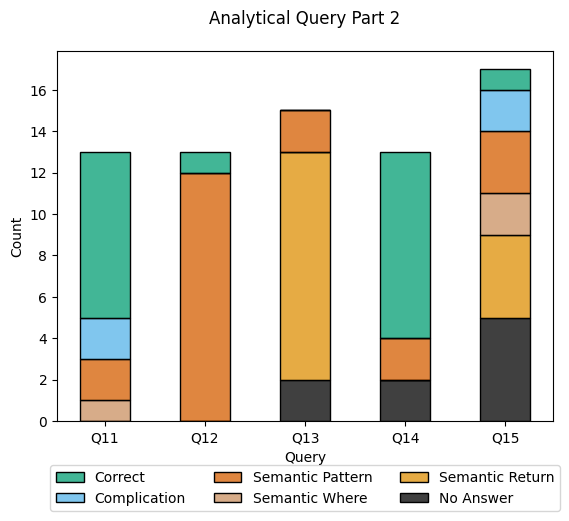

In [24]:
fig, ax = plt.subplots()

sns.histplot(
            data=melted_df,
            x="Query",
            hue="Label", multiple="stack",
            binwidth=.2,
              bins='auto',binrange=None, discrete=None,
            shrink=.5,
            palette=custom_palette).set(title='Analytical Query Part 2')




sns.move_legend(
                ax, "upper center",
                bbox_to_anchor=(.5, -0.1), ncol=3, title=None, frameon=True,
            )
plt.show()
#fig.savefig('fig/analytical2_Categories.png', bbox_inches='tight')


In [25]:

counts = melted_df.value_counts()
counts

Query  Label           
Q12    Semantic Pattern    12
Q13    Semantic Return     11
Q14    Correct              9
Q11    Correct              8
Q15    No Answer            5
       Semantic Return      4
       Semantic Pattern     3
Q14    No Answer            2
Q15    Complication         2
Q14    Semantic Pattern     2
Q11    Complication         2
Q13    Semantic Pattern     2
       No Answer            2
Q11    Semantic Pattern     2
Q15    Semantic Where       2
       Correct              1
Q12    Correct              1
Q11    Semantic Where       1
Name: count, dtype: int64

In [26]:
schema = error_category_df['Schema']
properties = error_category_df['Properties']
counts = schema.value_counts()
countp = properties.value_counts()
schema = schema[schema != 'INVALID']
properties=properties[properties!='INVALID']
properties=properties[properties!='INVALID0']
schema = schema.astype(float)
properties = properties.astype(float)
print(schema.mean())
print(schema.std())
print(properties.mean())
print(properties.std())


0.9287843137254901
0.1640808719778744
0.45356862745098037
0.48540973434417084


Text(0.5, 0, 'F1 score')

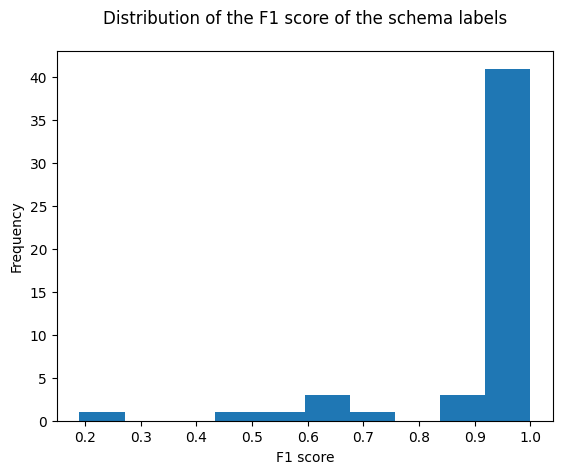

In [27]:
ax = schema.plot.hist()
plt.title('Distribution of the F1 score of the schema labels')
plt.xlabel('F1 score')

Text(0.5, 0, 'F1 score')

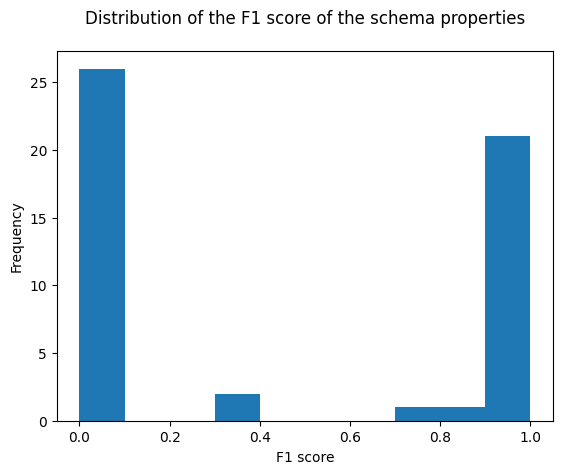

In [28]:
ax = properties.plot.hist()
plt.title('Distribution of the F1 score of the schema properties')
plt.xlabel('F1 score')

# Person Correlation for the schema derivation

In [30]:
schemas = error_category_df[['TEST ID','Q5','Schema','Properties']]
schemas=schemas.set_index('TEST ID')
schemas['Schema']=schemas['Schema'].apply(lambda x: 0 if 'INVALID' in x else x)
schemas['Properties']=schemas['Properties'].apply(lambda x: 0 if 'INVALID' in x else x)
schemas['Schema'] = schemas['Schema'].astype(float)
schemas['Properties'] = schemas['Properties'].astype(float)
print(stats.pearsonr(schemas['Q5'],schemas['Schema']))
print(stats.pearsonr(schemas['Q5'],schemas['Properties']))

PearsonRResult(statistic=0.031796808536689584, pvalue=0.8110508106153791)
PearsonRResult(statistic=0.2563468523440643, pvalue=0.050020201757324176)


In [31]:
error_category_part1 = error_category_df[["Q1","Q2","Q3","Q4"]]
error_category_part1_given = error_category_part1[["Q1","Q2","Q3","Q4"]].apply(pd.value_counts,axis=1).fillna(0)
schemas_given =  schemas.join(error_category_part1_given)
print(stats.pearsonr(error_category_part1_given['Semantic Return'],schemas_given['Schema']))
print(stats.pearsonr(error_category_part1_given['Semantic Return'],schemas_given['Properties']))
print(stats.pearsonr(error_category_part1_given['Complication'],schemas_given['Schema']))
print(stats.pearsonr(error_category_part1_given['Complication'],schemas_given['Properties']))
print(stats.pearsonr(error_category_part1_given['Correct'],schemas_given['Schema']))
print(stats.pearsonr(error_category_part1_given['Correct'],schemas_given['Properties']))

PearsonRResult(statistic=-0.0872874136773262, pvalue=0.5109376213089823)
PearsonRResult(statistic=-0.2341123214600962, pvalue=0.07431525492088077)
PearsonRResult(statistic=-0.1692935652331284, pvalue=0.19990542989905027)
PearsonRResult(statistic=-0.29748082362889644, pvalue=0.022127381264093457)
PearsonRResult(statistic=0.19650734730770023, pvalue=0.1357796270208119)
PearsonRResult(statistic=0.29657098139289134, pvalue=0.02255777094052561)


In [32]:
error_category_part1 = error_category_df[["Q1","Q2","Q3","Q4"]]
error_category_part1_given = error_category_part1[["Q1","Q2","Q3","Q4"]].apply(pd.value_counts,axis=1).fillna(0)
schemas_given =  schemas.join(error_category_part1_given)
print(stats.pearsonr(error_category_part1_given['Semantic Return'],schemas_given['Schema']))
print(stats.pearsonr(error_category_part1_given['Semantic Return'],schemas_given['Properties']))

PearsonRResult(statistic=-0.0872874136773262, pvalue=0.5109376213089823)
PearsonRResult(statistic=-0.2341123214600962, pvalue=0.07431525492088077)


# Analysis of the type of errors

In [33]:
category_queries_df = error_category_df[['Q1','Q2','Q3','Q4']]
type_queries_df = error_type_df[['Q1','Q2','Q3','Q4']]
# Melting the DataFrame
category_melted = category_queries_df.melt( var_name='Query', value_name='Label').to_numpy().tolist()
type_melted = type_queries_df.melt( var_name='Query', value_name='Label').to_numpy().tolist()

complication_queries=[]
semantic_queries=[]

for count,query in enumerate(category_melted):
    if('Complication' in query[1]):
        complication_queries.append(type_melted[count])
    if('Semantic' in query[1]):
        semantic_queries.append(type_melted[count])
      
complication_queries_df = pd.DataFrame(complication_queries, columns=['Query','Label'])
semantic_queries_df = pd.DataFrame(semantic_queries, columns=['Query','Label'])      


complication_queries_df.dropna(inplace=True)
complication_queries_df['Label'] =complication_queries_df['Label'].str.split(',')

# Explode the DataFrame to create new rows
complication_queries_df = complication_queries_df.explode('Label')
complication_queries_df['Label'] = complication_queries_df['Label'].apply(lambda x: x.strip(' '))
# Display the resulting DataFrame
label_counts = complication_queries_df['Label'].value_counts()
print(label_counts)


semantic_queries_df.dropna(inplace=True)
semantic_queries_df['Label'] =semantic_queries_df['Label'].str.split(',')

# Explode the DataFrame to create new rows
semantic_queries_df = semantic_queries_df.explode('Label')
semantic_queries_df['Label'] = semantic_queries_df['Label'].apply(lambda x: x.strip(' '))
# Display the resulting DataFrame
label_counts = semantic_queries_df['Label'].value_counts()

print(label_counts)

Label
Added With       49
Added Collect    40
Added Unwind     27
Name: count, dtype: int64
Label
Missing Distinct       6
Wrong Information      1
Missing Information    1
Name: count, dtype: int64


/var/folders/px/93csxpls7052_clqzsxch_8h0000gn/T/ipykernel_44459/1036232766.py:4: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.histplot(


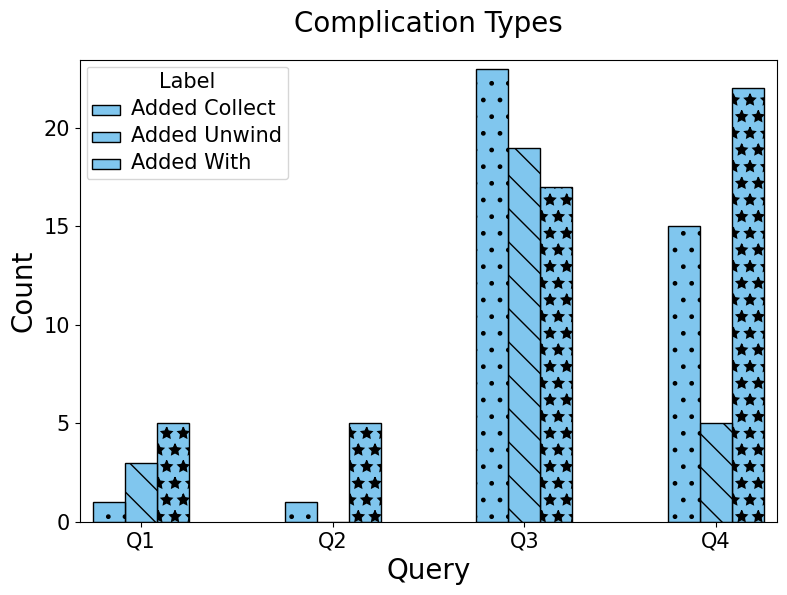

In [35]:
fig, ax = plt.subplots()
fig.set_size_inches(9, 6)
hatches = ['*', '\\','.']
sns.histplot(
            data=complication_queries_df,
            x="Query",
            hue="Label", multiple="dodge",
            binwidth=.2,
              bins='auto',binrange=None, discrete=None,
            shrink=.5,
            palette=[custom_palette['Complication'],custom_palette['Complication'],custom_palette['Complication'],custom_palette['Complication']]).set(title='Type Of Complications in Discovery Queries')

idx=0
for bars, hatch in zip(ax.containers, hatches):
    # Set a different hatch for each group of bars
    for bar in bars:
        bar.set_hatch(hatch)
plt.title('Complication Types', fontsize=20)
plt.margins(x=0.02)
plt.margins(y=0.02)
plt.xlabel("Query", fontsize=20)
plt.ylabel("Count", fontsize=20)        
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.setp(ax.get_legend().get_title(), fontsize='15')
plt.setp(ax.get_legend().get_texts(), fontsize='15')
plt.show()
#fig.savefig('fig/Schema_Discovery_complication_types.png', bbox_inches='tight')

In [38]:
counts = semantic_queries_df.value_counts()
counts

Query  Label              
Q4     Missing Distinct       4
Q3     Missing Distinct       2
Q1     Wrong Information      1
Q3     Missing Information    1
Name: count, dtype: int64

/var/folders/px/93csxpls7052_clqzsxch_8h0000gn/T/ipykernel_44459/4257017386.py:22: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.barplot(


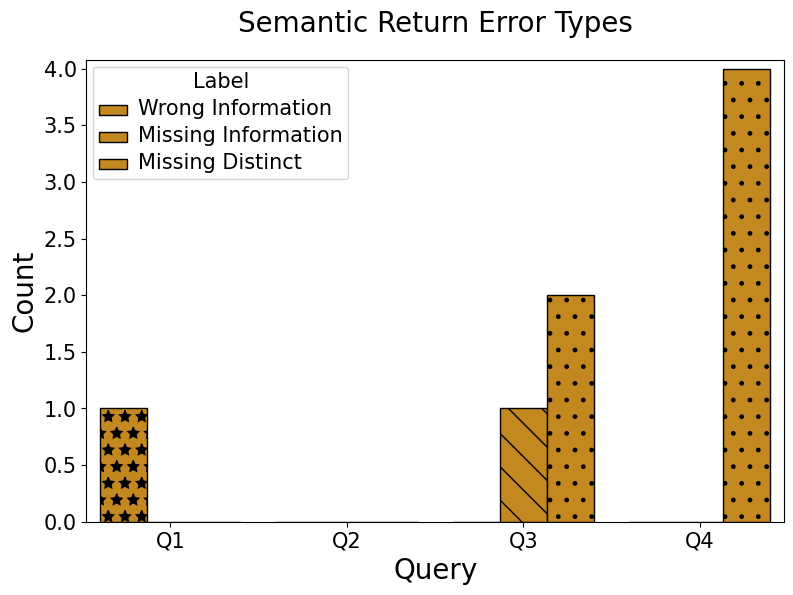

In [40]:
data = [
   ['Q1','Wrong Information',1],
   ['Q1','Missing Information',0],
   ['Q1','Missing Distinct',0], 
   ['Q2','Wrong Information',0],
   ['Q2','Missing Information',0],
   ['Q2','Missing Distinct',0], 
   ['Q3','Wrong Information',0],
   ['Q3','Missing Information',1],
   ['Q3','Missing Distinct',2], 
   ['Q4','Wrong Information',0],
   ['Q4','Missing Information',0],
   ['Q4','Missing Distinct',4], 
]


test_df = pd.DataFrame(data, columns = ['Query', 'Label', 'Count'])

fig, ax = plt.subplots()
fig.set_size_inches(9, 6)
hatches = ['*', '\\','.']
sns.barplot(
            data=test_df,
            x="Query", y='Count',
            hue="Label",
            
            linewidth=1, edgecolor="black",
            fill=True,
            palette=[custom_palette['Semantic Return'],custom_palette['Semantic Return'],custom_palette['Semantic Return'],custom_palette['Semantic Return']]).set(title='Type Of Semantic Return Errors in Schema Discovery Queries')

idx=0
for bars, hatch in zip(ax.containers, hatches):
    # Set a different hatch for each group of bars
    for bar in bars:
        bar.set_hatch(hatch)

plt.title('Semantic Return Error Types', fontsize=20)
plt.margins(x=0.02)
plt.margins(y=0.02)
plt.xlabel("Query", fontsize=20)
plt.ylabel("Count", fontsize=20)        
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.setp(ax.get_legend().get_title(), fontsize='15')
plt.setp(ax.get_legend().get_texts(), fontsize='15')
plt.show()
#fig.savefig('fig/Schema_Discovery__return_error_types.png', bbox_inches='tight')

In [41]:
category_queries_df = error_category_df[['Q6','Q7','Q8','Q9','Q10']]
type_queries_df = error_type_df[['Q6','Q7','Q8','Q9','Q10']]
# Melting the DataFrame
category_melted = category_queries_df.melt( var_name='Query', value_name='Label').to_numpy().tolist()
type_melted = type_queries_df.melt( var_name='Query', value_name='Label').to_numpy().tolist()

complication_queries=[]
semantic_queries=[]

for count,query in enumerate(category_melted):
    if(not str(query[1])=='nan'):
        if('Complication' in query[1]):
            complication_queries.append(type_melted[count])
        if('Semantic' in query[1] and query[1]!=None):
            semantic_queries.append(type_melted[count])
      
complication_queries_df = pd.DataFrame(complication_queries, columns=['Query','Label'])
semantic_queries_df = pd.DataFrame(semantic_queries, columns=['Query','Label'])      


complication_queries_df.dropna(inplace=True)
complication_queries_df['Label'] =complication_queries_df['Label'].str.split(',')

# Explode the DataFrame to create new rows
complication_queries_df = complication_queries_df.explode('Label')
complication_queries_df['Label'] = complication_queries_df['Label'].apply(lambda x: x.strip(' '))
# Display the resulting DataFrame
label_counts = complication_queries_df['Label'].value_counts()
print(label_counts)


semantic_queries_df.dropna(inplace=True)
semantic_queries_df['Label'] =semantic_queries_df['Label'].str.split(',')

# Explode the DataFrame to create new rows
semantic_queries_df = semantic_queries_df.explode('Label')
semantic_queries_df['Label'] = semantic_queries_df['Label'].apply(lambda x: x.strip(' '))
# Display the resulting DataFrame
label_counts = semantic_queries_df['Label'].value_counts()

print(label_counts)

Label
Added Collect in return shape    24
Added Collect                     2
Additional Information            1
Name: count, dtype: int64
Label
Missing Condition                                                  49
Wrong Information                                                  37
Missing Distinct                                                   34
Wrong Property                                                     31
Wrong Pattern                                                      21
Wrong Edge Direction                                               14
Missing Information                                                12
Wrong Pattern wrt Schema                                           11
Wrong pattern wrt schema                                            5
Missing Node                                                        4
Wrong Operator                                                      4
Wrong Condition                                                     3
Additional Nod

In [43]:
counts = complication_queries_df.value_counts()
counts

Query  Label                        
Q7     Added Collect in return shape    13
Q6     Added Collect in return shape    11
Q10    Added Collect                     2
Q9     Additional Information            1
Name: count, dtype: int64

/var/folders/px/93csxpls7052_clqzsxch_8h0000gn/T/ipykernel_44459/1590971911.py:21: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.barplot(


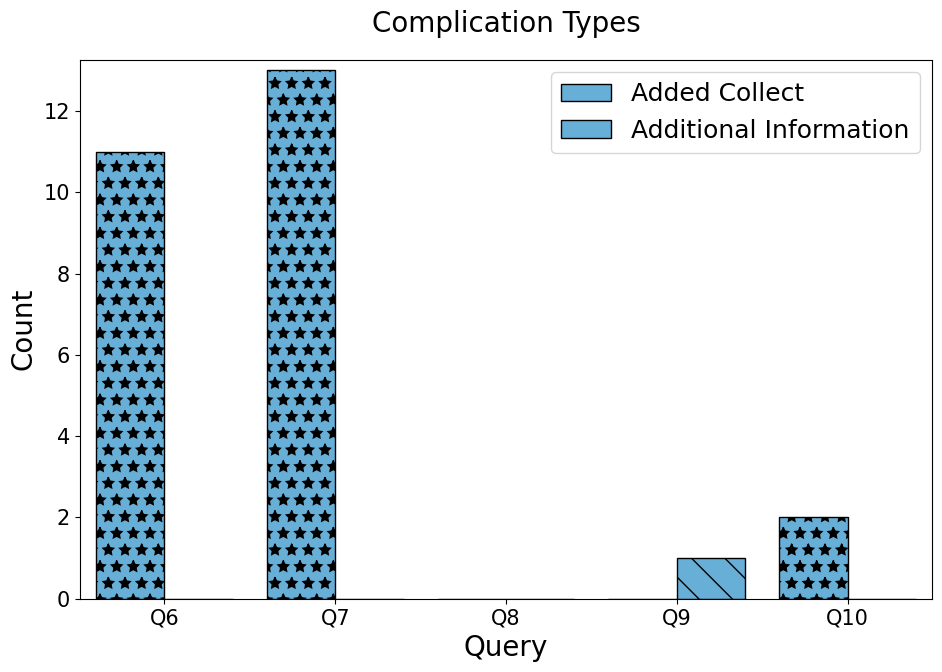

In [44]:
data = [
   ['Q6','Added Collect',11],
   ['Q6','Additional Information',0],
   ['Q7','Added Collect',13], 
   ['Q7','Additional Information',0],
   ['Q8','Added Collect',0],
   ['Q8','Additional Information',0], 
   ['Q9','Added Collect',0],
   ['Q9','Additional Information',1],
   ['Q10','Added Collect',2], 
   ['Q10','Additional Information',0],
   
]


test_df = pd.DataFrame(data, columns = ['Query', 'Label', 'Count'])

fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
hatches = ['*', '\\','.']
sns.barplot(
            data=test_df,
            x="Query", y='Count',
            hue="Label",
            
            linewidth=1, edgecolor="black",
            fill=True,
            palette=[custom_palette['Complication'],custom_palette['Complication'],custom_palette['Complication'],custom_palette['Complication']]).set(title='Type Of Complications in Analytical Queries')

idx=0
for bars, hatch in zip(ax.containers, hatches):
    # Set a different hatch for each group of bars
    for bar in bars:
        bar.set_hatch(hatch)
plt.title('Complication Types', fontsize=20)
plt.margins(x=0.02)
plt.margins(y=0.02)
plt.xlabel("Query", fontsize=20)
plt.ylabel("Count", fontsize=20)        
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
sns.move_legend(
                ax, "upper right",
                fontsize=18,
                ncol=1, title=None, frameon=True,
            )
plt.show()
#fig.savefig('fig/analytical1_complication_types.png', bbox_inches='tight')

In [52]:
semantic_error_palette={
"Missing Condition":custom_palette['Semantic Where'],
"Missing Distinct":custom_palette['Semantic Return'],
"Wrong Property":custom_palette['Semantic Where'],
"Wrong Information":custom_palette['Semantic Return'],
"Wrong Pattern wrt Schema":custom_palette['Semantic Pattern'],
"Missing Information":custom_palette['Semantic Return'],
"Wrong Operator":custom_palette['Semantic Where'],
"Wrong Pattern":custom_palette['Semantic Pattern'],
"Missing Node":custom_palette['Semantic Pattern'],
"Wrong pattern wrt Schema":custom_palette['Semantic Return'],
"Wrong Condition":custom_palette['Semantic Where'],
"Wrong Distinct":custom_palette['Semantic Return'],
"Missing Count":custom_palette['Semantic Return'],
"Additional Node":custom_palette['Semantic Pattern'],
"Wrong Edge Direction":custom_palette['Semantic Pattern'],
"Space":'white'
}

                                    

semantic_return_labels = ["Wrong Distinct","Missing Information","Missing Distinct","Wrong information","Missing Count"]
semantic_where_labels = ["Wrong Operator","Wrong Condition","Missing Condition","Wrong Property"] 
semantic_pattern_labels = ["Wrong Pattern wrt Schema","Wrong Pattern","Additional Node","Missing Node", "Wrong Edge Direction"]

pattern_semantic_queries_df=semantic_queries_df[semantic_queries_df['Label'].isin(semantic_pattern_labels)]
return_semantic_queries_df=semantic_queries_df[semantic_queries_df['Label'].isin(semantic_return_labels)]
where_semantic_queries_df=semantic_queries_df[semantic_queries_df['Label'].isin(semantic_where_labels)]


In [47]:
counts = return_semantic_queries_df.value_counts()
counts

Query  Label              
Q6     Missing Distinct       16
Q7     Missing Distinct       14
Q10    Missing Information    12
Q8     Missing Distinct        4
       Missing Count           1
Q9     Wrong information       1
Name: count, dtype: int64

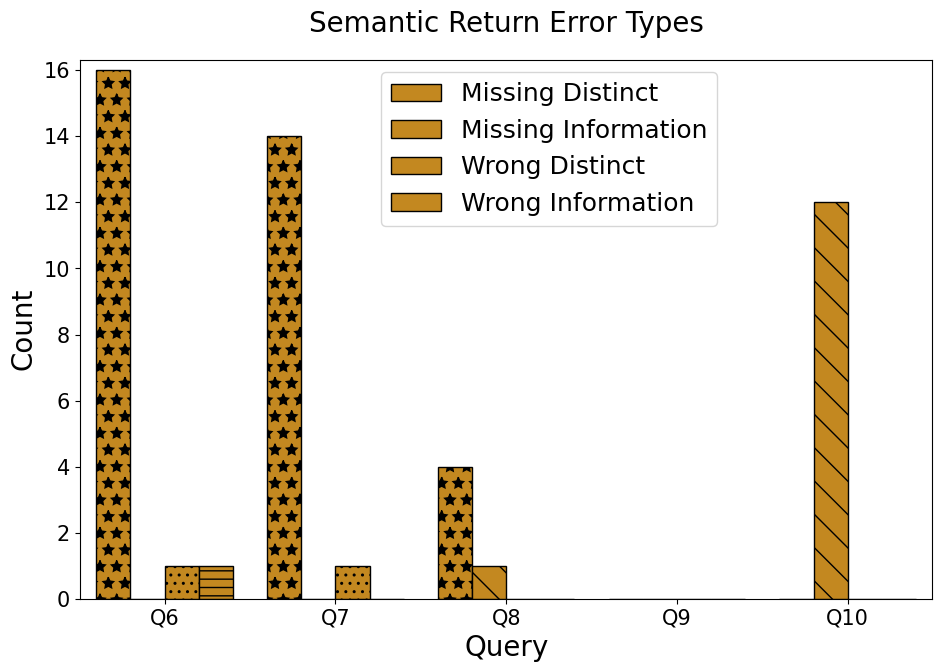

In [49]:
data = [
   ['Q6','Missing Distinct',16],
   ['Q6','Missing Information',0],
   ['Q6','Wrong Distinct',1], 
   ['Q6','Wrong Information',1],
   ['Q7','Missing Distinct',14],
   ['Q7','Missing Information',0], 
   ['Q7','Wrong Distinct',1],
   ['Q7','Wrong Information',0],
   ['Q8','Missing Distinct',4], 
   ['Q8','Missing Information',1],
   ['Q8','Wrong Distinct',0],
   ['Q8','Wrong Information',0], 
   ['Q9','Missing Information',0], 
   ['Q9','Missing Distinct',0],
   ['Q9','Wrong Distinct',0],
   ['Q9','Wrong Information',0], 
   ['Q10','Missing Distinct',0], 
   ['Q10','Missing Information',12],
   ['Q10','Wrong Distinct',0],
   ['Q10','Wrong Information',0], 
   
]


test_df = pd.DataFrame(data, columns = ['Query', 'Label', 'Count'])

fig, ax = plt.subplots()
hatches = ['*', '\\','..','--', '+']
sns.barplot(
            data=test_df,
            x="Query", y='Count',
            hue="Label",
            
            linewidth=1, edgecolor="black",
            fill=True,
            palette=[custom_palette['Semantic Return'],custom_palette['Semantic Return'],custom_palette['Semantic Return'],custom_palette['Semantic Return']]).set(title='Type Of Semantic Return Errors in Analytical Queries')

idx=0
for bars, hatch in zip(ax.containers, hatches):
    # Set a different hatch for each group of bars
    for bar in bars:
        bar.set_hatch(hatch)
fig.set_size_inches(11, 7)
plt.title('Semantic Return Error Types', fontsize=20)
plt.margins(x=0.02)
plt.margins(y=0.02)
plt.xlabel("Query", fontsize=20)
plt.ylabel("Count", fontsize=20)        
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
sns.move_legend(
                ax, "upper center",
                fontsize=18,
                bbox_to_anchor=(0.55, 1),
                ncol=1, title=None, frameon=True,
            )
plt.show()
#fig.savefig('fig/Analytical1_return_error_types.png', bbox_inches='tight')

In [50]:
counts = pattern_semantic_queries_df.value_counts()
counts

Query  Label                   
Q8     Wrong Pattern               17
       Wrong Edge Direction        10
Q6     Wrong Pattern wrt Schema     6
Q7     Wrong Pattern wrt Schema     5
Q9     Wrong Edge Direction         4
Q10    Wrong Pattern                3
Q9     Missing Node                 3
Q8     Additional Node              2
Q10    Additional Node              1
       Missing Node                 1
Q9     Wrong Pattern                1
Name: count, dtype: int64

/var/folders/px/93csxpls7052_clqzsxch_8h0000gn/T/ipykernel_44459/3304725850.py:36: UserWarning: 
The palette list has fewer values (4) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(


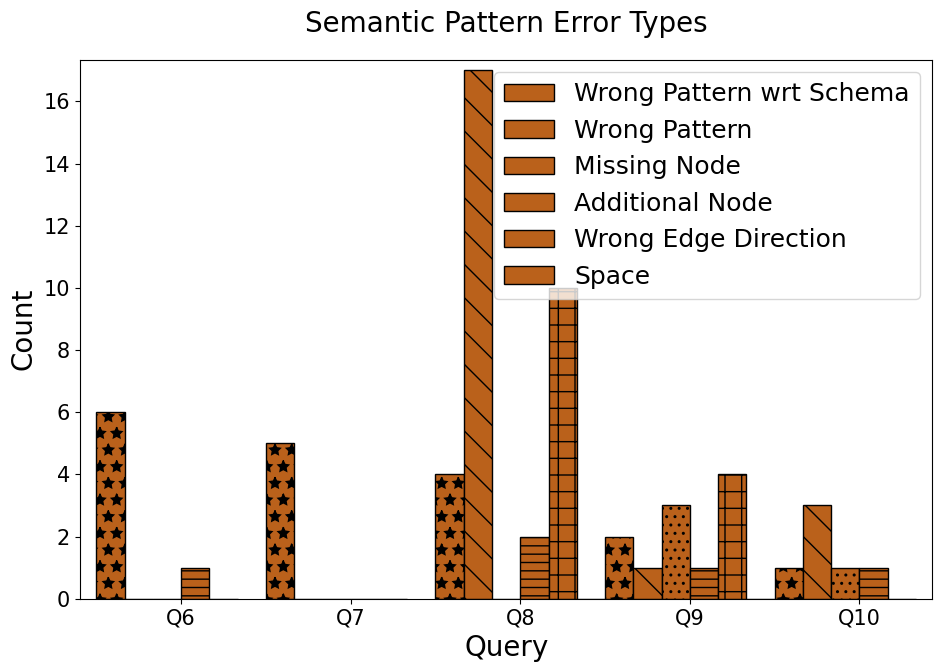

In [53]:
data = [
   ['Q6','Wrong Pattern wrt Schema',6],
   ['Q6','Wrong Pattern',0],
   ['Q6','Missing Node',0], 
   ['Q6','Additional Node',1],
   ['Q6','Wrong Edge Direction',0],
   ['Q7','Wrong Pattern wrt Schema',5],
   ['Q7','Wrong Pattern',0], 
   ['Q7','Missing Node',0],
   ['Q7','Additional Node',0],
   ['Q7','Wrong Edge Direction',0],
   ['Q8','Wrong Pattern wrt Schema',4], 
   ['Q8','Wrong Pattern',17],
   ['Q8','Missing Node',0],
   ['Q8','Additional Node',2], 
   ['Q8','Wrong Edge Direction',10],
   ['Q9','Wrong Pattern wrt Schema',2], 
   ['Q9','Wrong Pattern',1],
   ['Q9','Missing Node',3],
   ['Q9','Additional Node',1], 
   ['Q9','Wrong Edge Direction',4],
   ['Q10','Wrong Pattern wrt Schema',1], 
   ['Q10','Wrong Pattern',3],
   ['Q10','Missing Node',1],
   ['Q10','Additional Node',1], 
   ['Q10','Wrong Edge Direction',0],
   ['Q8', 'Space',0],
   ['Q9', 'Space',0]
]


test_df = pd.DataFrame(data, columns = ['Query', 'Label', 'Count'])

fig, ax = plt.subplots()
hatches = ['*', '\\','..','--','+']
sns.barplot(
            data=test_df,
            x="Query", y='Count',
            hue="Label",
            
            width=1,
            linewidth=1, edgecolor="black",
            fill=True,
            palette=[custom_palette['Semantic Pattern'],custom_palette['Semantic Pattern'],custom_palette['Semantic Pattern'],custom_palette['Semantic Pattern']]).set(title='Type Of Semantic Pattern Errors in Analytical Queries Part 1')

idx=0
for bars, hatch in zip(ax.containers, hatches):
    # Set a different hatch for each group of bars
    for bar in bars:
        bar.set_hatch(hatch)
fig.set_size_inches(11, 7)
plt.title('Semantic Pattern Error Types', fontsize=20)
plt.margins(x=0.02)
plt.margins(y=0.02)
plt.xlabel("Query", fontsize=20)
plt.ylabel("Count", fontsize=20)        
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
sns.move_legend(
                ax, "upper right",
                fontsize=18,
                
                ncol=1, title=None, frameon=True,
            )
plt.show()
#fig.savefig('fig/analytical_pattern_error_types.png', bbox_inches='tight')

In [54]:
counts = where_semantic_queries_df.value_counts()
counts

Query  Label            
Q10    Missing Condition    29
Q8     Wrong Property       28
Q9     Missing Condition    13
Q8     Missing Condition     7
       Wrong Operator        4
Q9     Wrong Condition       3
       Wrong Property        3
Name: count, dtype: int64

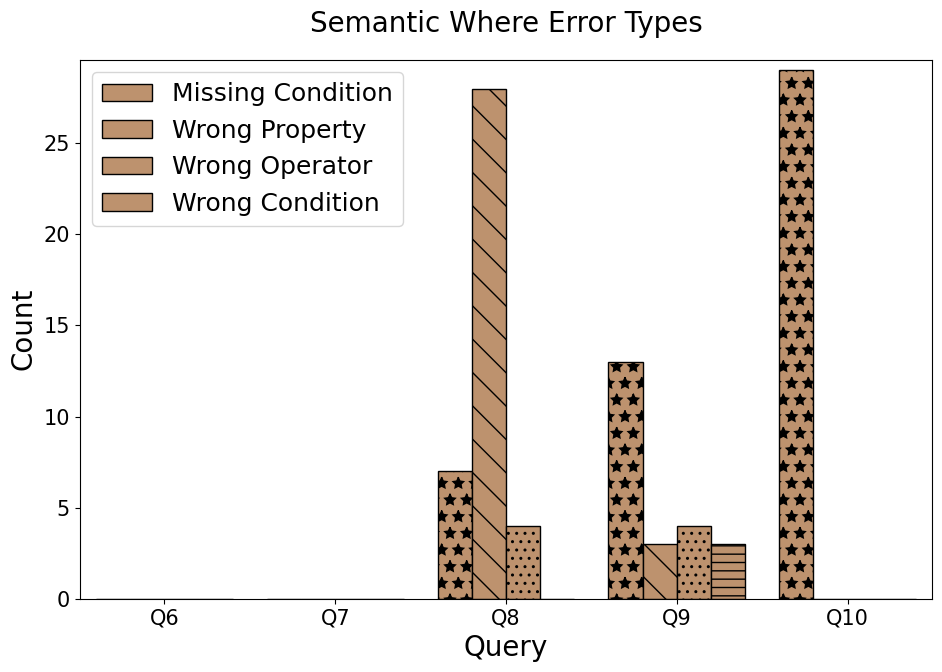

In [55]:
data = [
   ['Q6','Missing Condition',0],
   ['Q6','Wrong Property',0],
   ['Q6','Wrong Operator',0], 
   ['Q6','Wrong Condition',0],
   ['Q7','Missing Condition',0],
   ['Q7','Wrong Property',0], 
   ['Q7','Wrong Operator',0],
   ['Q7','Wrong Condition',0],
   ['Q8','Missing Condition',7], 
   ['Q8','Wrong Property',28],
   ['Q8','Wrong Operator',4],
   ['Q8','Wrong Condition',0], 
   ['Q9','Wrong Property',3], 
   ['Q9','Missing Condition',13],
   ['Q9','Wrong Operator',4],
   ['Q9','Wrong Condition',3], 
   ['Q10','Missing Condition',29], 
   ['Q10','Wrong Property',0],
   ['Q10','Wrong Operator',0],
   ['Q10','Wrong Condition',0], 
]


test_df = pd.DataFrame(data, columns = ['Query', 'Label', 'Count'])

fig, ax = plt.subplots()
hatches = ['*', '\\','..','--']
sns.barplot(
            data=test_df,
            x="Query", y='Count',
            hue="Label",
            
            linewidth=1, edgecolor="black",
            fill=True,
            palette=[custom_palette['Semantic Where'],custom_palette['Semantic Where'],custom_palette['Semantic Where'],custom_palette['Semantic Where']]).set(title='Type Of Semantic Where Errors in Analytical Queries Part 1')

idx=0
for bars, hatch in zip(ax.containers, hatches):
    # Set a different hatch for each group of bars
    for bar in bars:
        bar.set_hatch(hatch)
fig.set_size_inches(11, 7)
plt.title('Semantic Where Error Types', fontsize=20)
plt.margins(x=0.02)
plt.margins(y=0.02)
plt.xlabel("Query", fontsize=20)
plt.ylabel("Count", fontsize=20)        
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
sns.move_legend(
                ax, "upper left",
                fontsize=18,
                ncol=1, title=None, frameon=True,
            )
plt.show()
#fig.savefig('fig/analytical_where_error_types.png', bbox_inches='tight')

In [56]:
category_queries_df = error_category_df[['Q11','Q12','Q13','Q14','Q15']]
type_queries_df = error_type_df[['Q11','Q12','Q13','Q14','Q15']]
# Melting the DataFrame
category_melted = category_queries_df.melt( var_name='Query', value_name='Label').to_numpy().tolist()
type_melted = type_queries_df.melt( var_name='Query', value_name='Label').to_numpy().tolist()

complication_queries=[]
semantic_queries=[]

for count,query in enumerate(category_melted):
    if(not str(query[1])=='nan'):
        if('Complication' in query[1]):
            complication_queries.append(type_melted[count])
        if('Semantic' in query[1]):
            semantic_queries.append(type_melted[count])
      
complication_queries_df = pd.DataFrame(complication_queries, columns=['Query','Label'])
semantic_queries_df = pd.DataFrame(semantic_queries, columns=['Query','Label'])      


complication_queries_df.dropna(inplace=True)
complication_queries_df['Label'] =complication_queries_df['Label'].str.split(',')

# Explode the DataFrame to create new rows
complication_queries_df = complication_queries_df.explode('Label')
complication_queries_df['Label'] = complication_queries_df['Label'].apply(lambda x: x.strip(' '))
# Display the resulting DataFrame
label_counts = complication_queries_df['Label'].value_counts()
print(label_counts)


semantic_queries_df.dropna(inplace=True)
semantic_queries_df['Label'] =semantic_queries_df['Label'].str.split(',')

# Explode the DataFrame to create new rows
semantic_queries_df = semantic_queries_df.explode('Label')
semantic_queries_df['Label'] = semantic_queries_df['Label'].apply(lambda x: x.strip(' '))
semantic_queries_df = semantic_queries_df[semantic_queries_df['Label'] != ' ']
semantic_queries_df = semantic_queries_df[semantic_queries_df['Label'] != '']
# Display the resulting DataFrame
label_counts = semantic_queries_df['Label'].value_counts()

print(label_counts)

Label
Added Size(collect)    2
Added With             2
Name: count, dtype: int64
Label
Missing Information                      14
Wrong Edge Direction                     13
Missing Limit                            10
Additional Node                           3
Missing Condition                         2
Wrong Edge Label (not capitalized)        2
Wrong Edge Label (not capital letter)     1
Missing Node Label                        1
Wrong Operator                            1
Missing Node                              1
Wrong Information                         1
Name: count, dtype: int64


In [57]:
counts = complication_queries_df.value_counts()
counts

Query  Label              
Q11    Added Size(collect)    2
Q15    Added With             2
Name: count, dtype: int64

/var/folders/px/93csxpls7052_clqzsxch_8h0000gn/T/ipykernel_44459/3629888197.py:19: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.barplot(


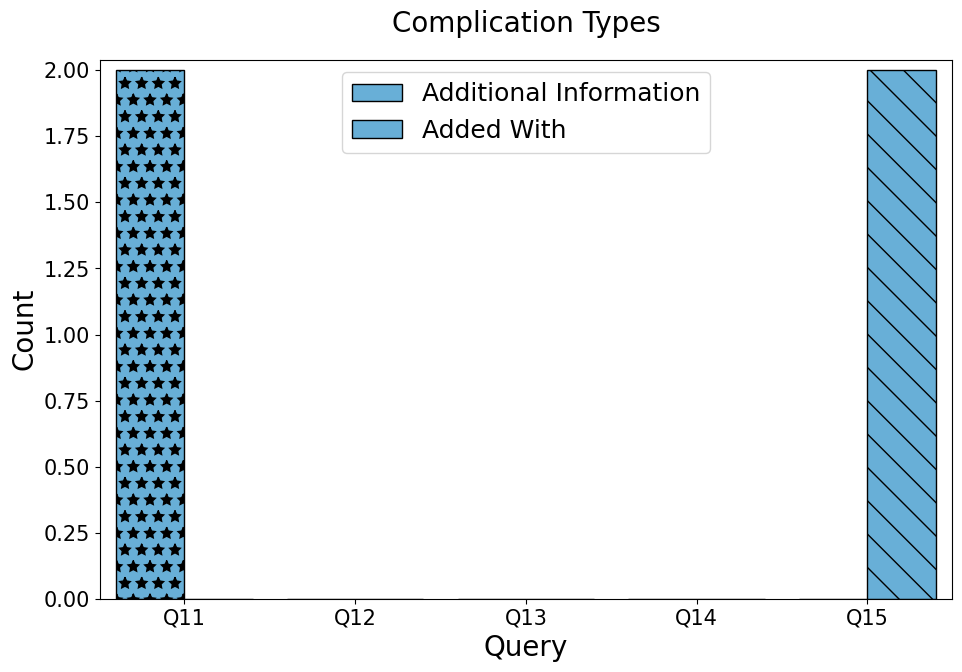

In [59]:
data = [
   ['Q11','Additional Information',2],
   ['Q11','Added With',0],
   ['Q12','Additional Information',0], 
   ['Q12','Added With',0],
   ['Q13','Additional Information',0],
   ['Q13','Added With',0], 
   ['Q14','Additional Information',0],
   ['Q14','Added With',0],
   ['Q15','Additional Information',0], 
   ['Q15','Added With',2],
]


test_df = pd.DataFrame(data, columns = ['Query', 'Label', 'Count'])

fig, ax = plt.subplots()
hatches = ['*', '\\','..','--']
sns.barplot(
            data=test_df,
            x="Query", y='Count',
            hue="Label",
            
            linewidth=1, edgecolor="black",
            fill=True,
            palette=[custom_palette['Complication'],custom_palette['Complication'],custom_palette['Complication'],custom_palette['Complication']]).set(title='Type Of Complications in Analytical Queries Part 2')

idx=0
for bars, hatch in zip(ax.containers, hatches):
    # Set a different hatch for each group of bars
    for bar in bars:
        bar.set_hatch(hatch)
fig.set_size_inches(11, 7)
plt.title('Complication Types', fontsize=20)
plt.margins(x=0.02)
plt.margins(y=0.02)
plt.xlabel("Query", fontsize=20)
plt.ylabel("Count", fontsize=20)        
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
sns.move_legend(
                ax, "upper center",
                fontsize=18,
                ncol=1, title=None, frameon=True,
            )
plt.show()
#fig.savefig('fig/aggregate_complication_types.png', bbox_inches='tight')

In [60]:
counts = semantic_queries_df['Label'].value_counts()
counts

Label
Missing Information                      14
Wrong Edge Direction                     13
Missing Limit                            10
Additional Node                           3
Missing Condition                         2
Wrong Edge Label (not capitalized)        2
Wrong Edge Label (not capital letter)     1
Missing Node Label                        1
Wrong Operator                            1
Missing Node                              1
Wrong Information                         1
Name: count, dtype: int64

In [61]:

semantic_return_labels = ["Wrong Distinct","Missing Information","Missing Distinct","Wrong information","Missing Count","Missing Limit"]
semantic_where_labels = ["Wrong Operator","Wrong Condition","Missing Condition","Wrong Property"] 
semantic_pattern_labels = ["Wrong Pattern wrt Schema","Wrong Pattern","Additional Node","Missing Node","Missing Node Label", "Wrong Edge Direction", 'Wrong Edge Label (not capitalized)','Wrong Edge Label (not capital letter)']

pattern_semantic_queries_df=semantic_queries_df[semantic_queries_df['Label'].isin(semantic_pattern_labels)]
return_semantic_queries_df=semantic_queries_df[semantic_queries_df['Label'].isin(semantic_return_labels)]
where_semantic_queries_df=semantic_queries_df[semantic_queries_df['Label'].isin(semantic_where_labels)]


In [69]:
semantic_error_palette={
"Missing Information":custom_palette['Semantic Return'],
"Wrong Edge Direction":custom_palette['Semantic Pattern'],
"Missing Limit":custom_palette['Semantic Return'],
"Wrong Edge Label":custom_palette['Semantic Pattern'],
"Additional Node":custom_palette['Semantic Pattern'],
"Missing Condition":custom_palette['Semantic Where'],
"Missing Node Label":custom_palette['Semantic Pattern'],
"Wrong Operator":custom_palette['Semantic Where'],
"Missing Node":custom_palette['Semantic Pattern'],
"Wrong Information":custom_palette['Semantic Return']
}

semantic_return_labels = ["Wrong Distinct","Missing Information","Missing Distinct","Wrong information","Missing Limit"]
semantic_where_labels = ["Wrong Operator","Wrong Condition","Missing Condition","Wrong Property"] 
semantic_pattern_labels = ["Wrong Pattern wrt Schema","Wrong Pattern","Additional Node","Missing Node","Wrong Edge Direction","Wrong Edge Label","Missing Node Label"]

pattern_semantic_queries_df=semantic_queries_df[semantic_queries_df['Label'].isin(semantic_pattern_labels)]
return_semantic_queries_df=semantic_queries_df[semantic_queries_df['Label'].isin(semantic_return_labels)]
where_semantic_queries_df=semantic_queries_df[semantic_queries_df['Label'].isin(semantic_where_labels)]



In [63]:
counts = return_semantic_queries_df.value_counts()
counts

Query  Label              
Q13    Missing Information    10
       Missing Limit           9
Q15    Missing Information     4
       Missing Limit           1
Name: count, dtype: int64

/var/folders/px/93csxpls7052_clqzsxch_8h0000gn/T/ipykernel_44459/441617070.py:19: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.barplot(


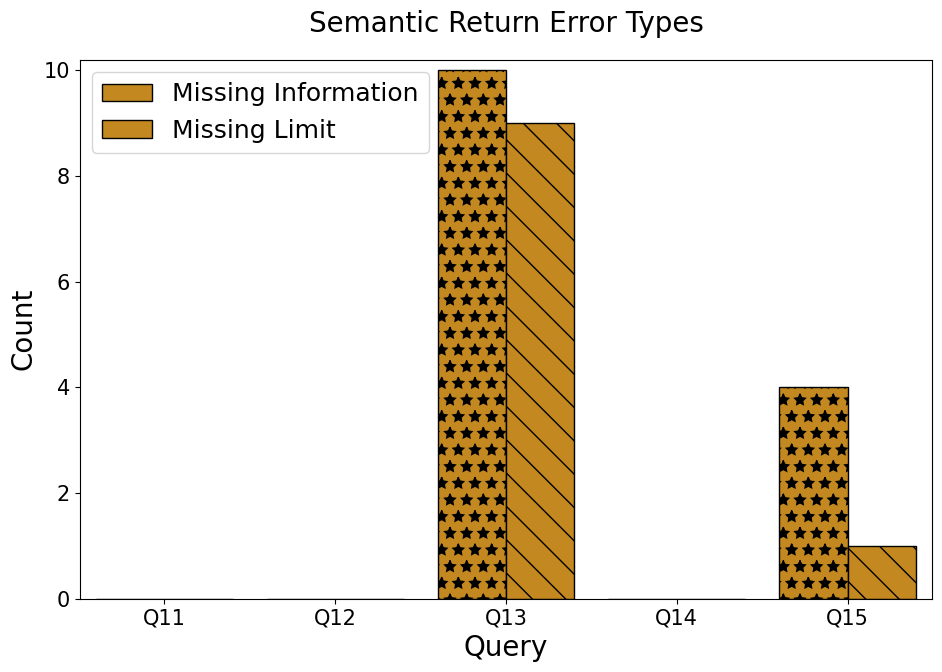

In [64]:
data = [
   ['Q11','Missing Information',0],
   ['Q11','Missing Limit',0],
   ['Q12','Missing Information',0],
   ['Q12','Missing Limit',0],
   ['Q13','Missing Information',10],
   ['Q13','Missing Limit',9],
   ['Q14','Missing Information',0],
   ['Q14','Missing Limit',0],
   ['Q15','Missing Information',4],
   ['Q15','Missing Limit',1],
]


test_df = pd.DataFrame(data, columns = ['Query', 'Label', 'Count'])

fig, ax = plt.subplots()
hatches = ['*', '\\','..','--']
sns.barplot(
            data=test_df,
            x="Query", y='Count',
            hue="Label",
            
            linewidth=1, edgecolor="black",
            fill=True,
            palette=[custom_palette['Semantic Return'],custom_palette['Semantic Return'],custom_palette['Semantic Return'],custom_palette['Semantic Return']]).set(title='Type Of Semantic Return Errors in Analytical Queries Part 1')

idx=0
for bars, hatch in zip(ax.containers, hatches):
    # Set a different hatch for each group of bars
    for bar in bars:
        bar.set_hatch(hatch)
fig.set_size_inches(11, 7)
plt.title('Semantic Return Error Types', fontsize=20)
plt.margins(x=0.02)
plt.margins(y=0.02)
plt.xlabel("Query", fontsize=20)
plt.ylabel("Count", fontsize=20)        
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
sns.move_legend(
                ax, "upper left",
                fontsize=18,
                ncol=1, title=None, frameon=True,
            )
plt.show()
#fig.savefig('fig/aggregation_return_types.png', bbox_inches='tight')

In [65]:
counts = where_semantic_queries_df.value_counts()
counts

Query  Label            
Q11    Missing Condition    1
Q15    Missing Condition    1
       Wrong Operator       1
Name: count, dtype: int64

/var/folders/px/93csxpls7052_clqzsxch_8h0000gn/T/ipykernel_44459/3235858984.py:19: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.barplot(


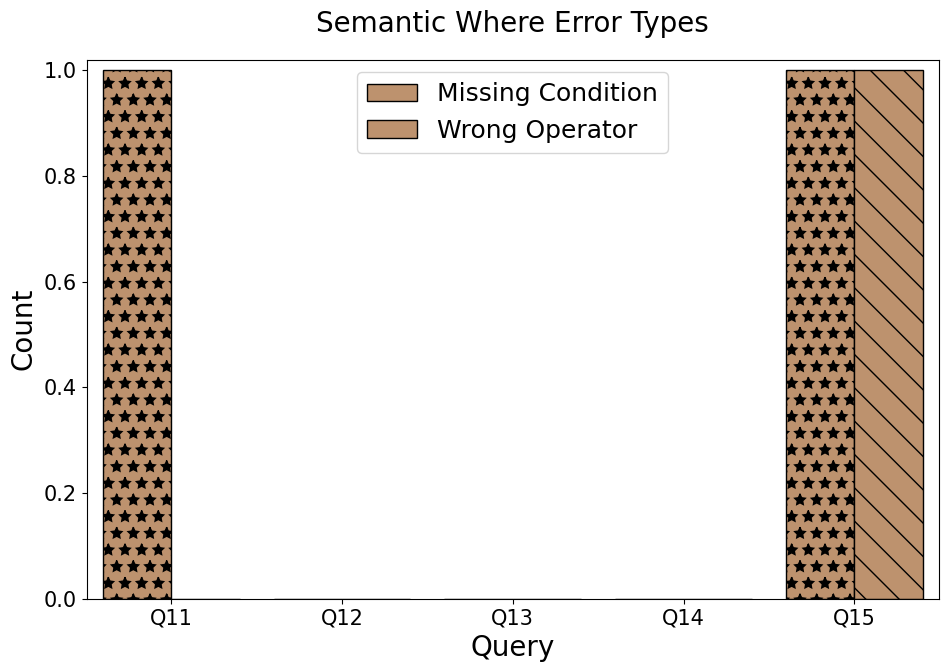

In [66]:
data = [
   ['Q11','Missing Condition',1],
   ['Q11','Wrong Operator',0],
   ['Q12','Missing Condition',0],
   ['Q12','Wrong Operator',0],
   ['Q13','Missing Condition',0],
   ['Q13','Wrong Operator',0],
   ['Q14','Missing Condition',0],
   ['Q14','Wrong Operator',0],
   ['Q15','Missing Condition',1],
   ['Q15','Wrong Operator',1],
]


test_df = pd.DataFrame(data, columns = ['Query', 'Label', 'Count'])

fig, ax = plt.subplots()
hatches = ['*', '\\','..','--']
sns.barplot(
            data=test_df,
            x="Query", y='Count',
            hue="Label",
            
            linewidth=1, edgecolor="black",
            fill=True,
            palette=[custom_palette['Semantic Where'],custom_palette['Semantic Where'],custom_palette['Semantic Where'],custom_palette['Semantic Where']]).set(title='Type Of Semantic Return Errors in Analytical Queries Part 1')

idx=0
for bars, hatch in zip(ax.containers, hatches):
    # Set a different hatch for each group of bars
    for bar in bars:
        bar.set_hatch(hatch)
fig.set_size_inches(11, 7)
plt.title('Semantic Where Error Types', fontsize=20)
plt.margins(x=0.02)
plt.margins(y=0.02)
plt.xlabel("Query", fontsize=20)
plt.ylabel("Count", fontsize=20)        
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
sns.move_legend(
                ax, "upper center",
                fontsize=18,
                ncol=1, title=None, frameon=True,
            )
plt.show()
#fig.savefig('fig/aggregation_where_types.png', bbox_inches='tight')

In [67]:
counts = pattern_semantic_queries_df.value_counts()
counts

Query  Label               
Q12    Wrong Edge Direction    11
Q13    Additional Node          2
Q11    Wrong Edge Direction     1
Q12    Additional Node          1
Q14    Missing Node Label       1
Q15    Missing Node             1
       Wrong Edge Direction     1
Name: count, dtype: int64

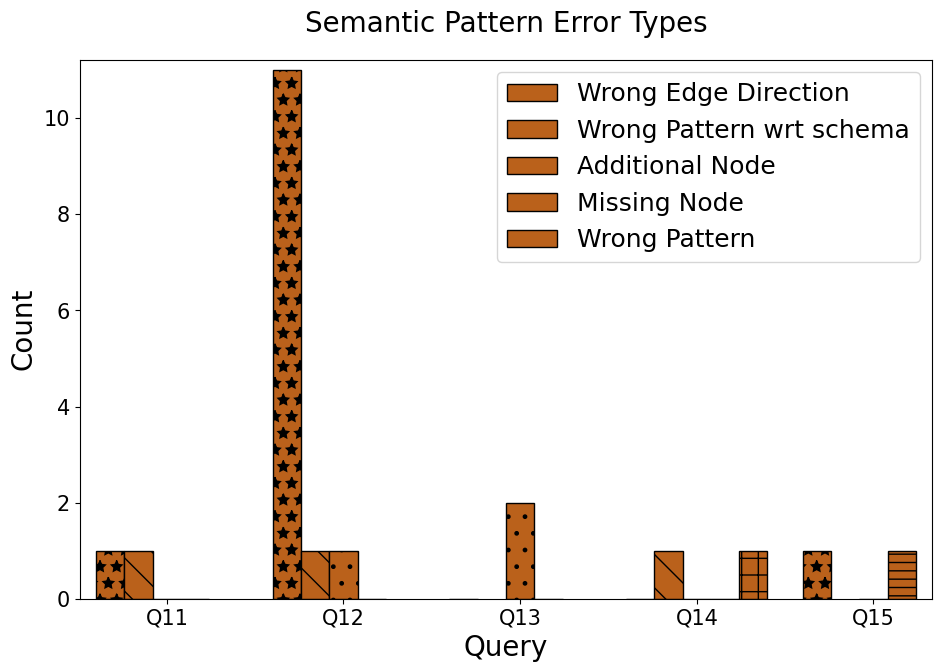

In [68]:
data = [
   ['Q11','Wrong Edge Direction',1],
   ['Q11','Wrong Pattern wrt schema',1],
   ['Q11','Additional Node',0],
   ['Q11','Missing Node',0],
   ['Q12','Wrong Edge Direction',11],
   ['Q12','Additional Node',1],
   ['Q12','Wrong Pattern wrt schema',1],
   ['Q12','Missing Node',0],
   ['Q13','Wrong Edge Direction',0],
   ['Q13','Additional Node',2],
   ['Q13','Missing Node',0],
   ['Q14','Wrong Edge Direction',0],
   ['Q14','Additional Node',0],
   ['Q14','Wrong Pattern',1],
   ['Q14','Wrong Pattern wrt schema',1],
   ['Q14','Missing Node',0],
   ['Q15','Wrong Edge Direction',1],
   ['Q15','Additional Node',0],
   ['Q15','Missing Node',1],
]


test_df = pd.DataFrame(data, columns = ['Query', 'Label', 'Count'])

fig, ax = plt.subplots()
hatches = ['*', '\\','.','--','+']
sns.barplot(
            data=test_df,
            x="Query", y='Count',
            hue="Label",
            
            linewidth=1, edgecolor="black",
            fill=True,
            palette=[custom_palette['Semantic Pattern'],custom_palette['Semantic Pattern'],custom_palette['Semantic Pattern'],custom_palette['Semantic Pattern'],custom_palette['Semantic Pattern']]).set(title='Type Of Semantic Return Errors in Analytical Queries Part 1')

idx=0
for bars, hatch in zip(ax.containers, hatches):
    # Set a different hatch for each group of bars
    for bar in bars:
        bar.set_hatch(hatch)
fig.set_size_inches(11, 7)
plt.title('Semantic Pattern Error Types', fontsize=20)
plt.margins(x=0.02)
plt.margins(y=0.02)
plt.xlabel("Query", fontsize=20)
plt.ylabel("Count", fontsize=20)        
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
sns.move_legend(
                ax, "upper right",
                fontsize=18,
                ncol=1, title=None, frameon=True,
            )
plt.show()
#fig.savefig('fig/aggregation_pattern_types.png', bbox_inches='tight')

In [ ]:
data = [
   ['Q6','Missing Distinct',16],
   ['Q6','Missing Information',0],
   ['Q6','Wrong Distinct',1], 
   ['Q6','Wrong Information',1],
   ['Q7','Missing Distinct',14],
   ['Q7','Missing Information',0], 
   ['Q7','Wrong Distinct',1],
   ['Q7','Wrong Information',0],
   ['Q8','Missing Distinct',6], 
   ['Q8','Missing Information',0],
   ['Q8','Wrong Distinct',0],
   ['Q8','Wrong Information',0], 
   ['Q9','Missing Information',2], 
   ['Q9','Missing Distinct',0],
   ['Q9','Wrong Distinct',0],
   ['Q9','Wrong Information',0], 
   ['Q10','Missing Distinct',0], 
   ['Q10','Missing Information',12],
   ['Q10','Wrong Distinct',0],
   ['Q10','Wrong Information',0], 
]


test_df = pd.DataFrame(data, columns = ['Query', 'Label', 'Count'])

fig, ax = plt.subplots()
hatches = ['*', '\\','..','--']
sns.barplot(
            data=test_df,
            x="Query", y='Count',
            hue="Label",
            
            linewidth=1, edgecolor="black",
            fill=True,
            palette=[custom_palette['Semantic Return'],custom_palette['Semantic Return'],custom_palette['Semantic Return'],custom_palette['Semantic Return']]).set(title='Type Of Semantic Return Errors in Analytical Queries Part 1')

idx=0
for bars, hatch in zip(ax.containers, hatches):
    # Set a different hatch for each group of bars
    for bar in bars:
        bar.set_hatch(hatch)

plt.title('Semantic Return Error Types', fontsize=20)
plt.margins(x=0.02)
plt.margins(y=0.02)
plt.xlabel("Query", fontsize=20)
plt.ylabel("Count", fontsize=20)        
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
sns.move_legend(
                ax, "upper center",
                fontsize=15,
                bbox_to_anchor=(.5, -0.20), ncol=3, title=None, frameon=True,
            )
fig.savefig('fig/Schema_Discovery_error_types.png', bbox_inches='tight')

In [70]:
error_category_df.columns

Index(['TEST ID', 'consent',
       'What language can you program in? (List the different languages separated by a comma)',
       'How do you rate your knowledge of relational databases (e.g., MySQL))?(1 = never heard of it, 5 = can use it in a professional environment)',
       'How do you rate your knowledge of NoSQL databases (e.g., MongoDB, Cassandra)?(1 = never heard of it, 5 = can use it in a professional environment)',
       'Which one in particular?',
       'How do you rate your knowledge of other graph structures beside property graphs (e.g., RDF and SPARQL)?(1 = never heard of it, 5 = can use it in a professional environment)',
       'Are you knowledgable of any of the following graph query languages?',
       'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Schema', 'Properties', 'Q6', 'Q7', 'Q8',
       'Q9', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15'],
      dtype='object')

In [73]:
demographics = error_category_df[['TEST ID', 'consent','What language can you program in? (List the different languages separated by a comma)','How do you rate your knowledge of relational databases (e.g., MySQL))?(1 = never heard of it, 5 = can use it in a professional environment)','How do you rate your knowledge of NoSQL databases (e.g., MongoDB, Cassandra)?(1 = never heard of it, 5 = can use it in a professional environment)','Which one in particular?','How do you rate your knowledge of other graph structures beside property graphs (e.g., RDF and SPARQL)?(1 = never heard of it, 5 = can use it in a professional environment)','Are you knowledgable of any of the following graph query languages?']]
demographics=demographics.rename(columns={
    'What language can you program in? (List the different languages separated by a comma)':"ProgrammingLanguages",
    'How do you rate your knowledge of relational databases (e.g., MySQL))?(1 = never heard of it, 5 = can use it in a professional environment)':"RelDBKnowledge",
    'How do you rate your knowledge of NoSQL databases (e.g., MongoDB, Cassandra)?(1 = never heard of it, 5 = can use it in a professional environment)':"NoSQLKnowledge",
    'Which one in particular?':"NoSQLDBS",
    'How do you rate your knowledge of other graph structures beside property graphs (e.g., RDF and SPARQL)?(1 = never heard of it, 5 = can use it in a professional environment)':"GraphKnowledge",
    'Are you knowledgable of any of the following graph query languages?':"GraphQueryLanguages"
})
demographics.head()

,TEST ID,consent,ProgrammingLanguages,RelDBKnowledge,NoSQLKnowledge,NoSQLDBS,GraphKnowledge,GraphQueryLanguages
0,student-0,Accept,"Python,java, C ,Dart",4,4,"MongoDB, InfluxDB",3,OpenCypher
1,student-1,Accept,"c++, java, python, prolog/datalog, js",3,1,"InfluxDB, Other",1,NaN
2,student-2,Accept,Python,3,3,MongoDB,2,"OpenCypher, SQL/PGQ"
3,student-3,Accept,"Python, JavaScript",3,1,Other,1,NaN
4,student-4,Accept,"Python, java, scala, R",4,4,"MongoDB, Other",3,OpenCypher


In [75]:
error_category_part1 = error_category_df[["Q1","Q2","Q3","Q4"]]

error_category_part1_given = error_category_part1[["Q1","Q2","Q3","Q4"]].apply(pd.value_counts,axis=1).fillna(0)


In [76]:

error_category_part1 = error_category_df[["Q1","Q2","Q3","Q4"]]
error_category_part1_given = error_category_part1[["Q1","Q2","Q3","Q4"]].apply(pd.value_counts,axis=1).fillna(0)
df_stats_part_1_given = demographics.join(error_category_part1_given)
for kn in ['RelDBKnowledge','NoSQLKnowledge','GraphKnowledge']:
    for cat in ['SyntaxError','Semantic Return', 'Complication','Correct','Other']:
        try:
            print(kn,cat,stats.pearsonr(df_stats_part_1_given[kn],df_stats_part_1_given[cat]))
            
        except Exception as e:
            print(e)
            continue            

df_stats_part_1_given=df_stats_part_1_given.reset_index()

RelDBKnowledge SyntaxError PearsonRResult(statistic=0.03255296876368385, pvalue=0.806643071323395)
RelDBKnowledge Semantic Return PearsonRResult(statistic=-0.0008132199420910311, pvalue=0.9951227145513317)
RelDBKnowledge Complication PearsonRResult(statistic=0.04368724774570844, pvalue=0.7424994883161304)
RelDBKnowledge Correct PearsonRResult(statistic=-0.13434174061023205, pvalue=0.3103788083727824)
RelDBKnowledge Other PearsonRResult(statistic=0.19262377378786727, pvalue=0.14383946567783465)
NoSQLKnowledge SyntaxError PearsonRResult(statistic=-0.04014694638792652, pvalue=0.7627296192386072)
NoSQLKnowledge Semantic Return PearsonRResult(statistic=0.023544938541315754, pvalue=0.8595028473990706)
NoSQLKnowledge Complication PearsonRResult(statistic=0.2730671260017198, pvalue=0.036390216541391976)
NoSQLKnowledge Correct PearsonRResult(statistic=-0.2830920338971717, pvalue=0.02981023444161524)
NoSQLKnowledge Other PearsonRResult(statistic=0.14166136796882656, pvalue=0.28450739697277616)
G

In [77]:

error_category_part2 = error_category_df[["Q6","Q7","Q8","Q9","Q10"]]
error_category_part2_given = error_category_part2[["Q6","Q7","Q8","Q9","Q10"]].apply(pd.value_counts,axis=1).fillna(0)
df_stats_part_2_given = demographics.join(error_category_part2_given)
for kn in ['RelDBKnowledge','NoSQLKnowledge','GraphKnowledge']:
    for cat in ['SyntaxError','Semantic Return','Semantic Where','Semantic Pattern', 'Complication','Correct','Other']:
        try:
            print(kn,cat,stats.pearsonr(df_stats_part_2_given[kn],df_stats_part_2_given[cat]))
        except:
            pass

df_stats_part_2_given=df_stats_part_2_given.reset_index()

RelDBKnowledge SyntaxError PearsonRResult(statistic=-0.10026253501027918, pvalue=0.4499129313941343)
RelDBKnowledge Semantic Return PearsonRResult(statistic=0.28021037972498547, pvalue=0.03159072689242514)
RelDBKnowledge Semantic Where PearsonRResult(statistic=0.28962083039106373, pvalue=0.02608501297746149)
RelDBKnowledge Semantic Pattern PearsonRResult(statistic=-0.09689801633892832, pvalue=0.4653391242631071)
RelDBKnowledge Complication PearsonRResult(statistic=-0.13283224018002746, pvalue=0.3158964175386396)
RelDBKnowledge Correct PearsonRResult(statistic=-0.029941426836078287, pvalue=0.8218904982266089)
NoSQLKnowledge SyntaxError PearsonRResult(statistic=0.04384309271932509, pvalue=0.7416128062262084)
NoSQLKnowledge Semantic Return PearsonRResult(statistic=0.11139350402274487, pvalue=0.4009413988258172)
NoSQLKnowledge Semantic Where PearsonRResult(statistic=0.21299594654733012, pvalue=0.10529807340065288)
NoSQLKnowledge Semantic Pattern PearsonRResult(statistic=-0.0145908186744549

In [78]:

error_category_part3 = error_category_df[["Q11","Q12","Q13","Q14","Q15"]]
error_category_part3_given = error_category_part3[["Q11","Q12","Q13","Q14","Q15"]].apply(pd.value_counts,axis=1).fillna(0)
df_stats_part_3_given = demographics.join(error_category_part3_given)
for kn in ['RelDBKnowledge','NoSQLKnowledge','GraphKnowledge']:
    for cat in ['SyntaxError','Semantic Return','Semantic Where','Semantic Pattern', 'Complication','Correct','Other']:
        try:
            print(kn,cat,stats.pearsonr(df_stats_part_3_given[kn],df_stats_part_3_given[cat]))
        except:
            pass

df_stats_part_3_given=df_stats_part_3_given.reset_index()

RelDBKnowledge Semantic Return PearsonRResult(statistic=0.08536883127452609, pvalue=0.5203048522579816)
RelDBKnowledge Semantic Where PearsonRResult(statistic=-0.10026253501027908, pvalue=0.44991293139413513)
RelDBKnowledge Semantic Pattern PearsonRResult(statistic=0.3053804275757664, pvalue=0.01867425815188162)
RelDBKnowledge Complication PearsonRResult(statistic=0.1224397080706913, pvalue=0.35557116998377764)
RelDBKnowledge Correct PearsonRResult(statistic=0.08527495064723974, pvalue=0.52076541318034)
NoSQLKnowledge Semantic Return PearsonRResult(statistic=-0.07483402199201714, pvalue=0.5732284896497405)
NoSQLKnowledge Semantic Where PearsonRResult(statistic=-0.09230124783015803, pvalue=0.48686958772772576)
NoSQLKnowledge Semantic Pattern PearsonRResult(statistic=0.03342758975509839, pvalue=0.8015522657189085)
NoSQLKnowledge Complication PearsonRResult(statistic=0.0201418407885413, pvalue=0.8796464041692424)
NoSQLKnowledge Correct PearsonRResult(statistic=0.0027929216516588517, pvalu

In [80]:
df_stats_part_1_given.head()

,index,TEST ID,consent,ProgrammingLanguages,RelDBKnowledge,NoSQLKnowledge,NoSQLDBS,GraphKnowledge,GraphQueryLanguages,Complication,Correct,Other,Semantic Return,SyntaxError
0,0,student-0,Accept,"Python,java, C ,Dart",4,4,"MongoDB, InfluxDB",3,OpenCypher,4.0,0.0,0.0,0.0,0.0
1,1,student-1,Accept,"c++, java, python, prolog/datalog, js",3,1,"InfluxDB, Other",1,NaN,2.0,2.0,0.0,0.0,0.0
2,2,student-2,Accept,Python,3,3,MongoDB,2,"OpenCypher, SQL/PGQ",3.0,1.0,0.0,0.0,0.0
3,3,student-3,Accept,"Python, JavaScript",3,1,Other,1,NaN,0.0,4.0,0.0,0.0,0.0
4,4,student-4,Accept,"Python, java, scala, R",4,4,"MongoDB, Other",3,OpenCypher,3.0,1.0,0.0,0.0,0.0


In [81]:
languages = df_stats_part_1_given[['TEST ID','ProgrammingLanguages']]
languages['ProgrammingLanguages'] =languages['ProgrammingLanguages'].str.split(',')

# Explode the DataFrame to create new rows
languages = languages.explode('ProgrammingLanguages')
languages['ProgrammingLanguages']=languages['ProgrammingLanguages'].fillna('Python')
languages['ProgrammingLanguages']= languages['ProgrammingLanguages'].apply(lambda x: x.strip(' '))
languages = languages[languages['ProgrammingLanguages'] != 'Html']
languages = languages[languages['ProgrammingLanguages'] != 'html']
languages = languages[languages['ProgrammingLanguages'] != 'HTML']
languages = languages[languages['ProgrammingLanguages'] != 'css']
languages = languages[languages['ProgrammingLanguages'] != '...']

languages = languages[languages['ProgrammingLanguages'] != 'cypher']
languages = languages[languages['ProgrammingLanguages'] != 'Cypher']
languages = languages[languages['ProgrammingLanguages'] != '']

languages = languages[languages['ProgrammingLanguages'] != ' ']
languages = languages[languages['ProgrammingLanguages'] != 'Shell']
languages = languages[languages['ProgrammingLanguages'] != 'Bash']
languages = languages[languages['ProgrammingLanguages'] != 'Unix']
languages = languages[languages['ProgrammingLanguages'] != 'Arduino']
languages = languages[languages['ProgrammingLanguages'] != 'Angular']
languages= languages.replace('python','Python')
languages= languages.replace('pyhton','Python')
languages= languages.replace('PYTHON','Python')
languages= languages.replace('java','Java')
languages= languages.replace('prolog/datalog','Prolog')
languages= languages.replace('ProLog','Prolog')
languages= languages.replace('javascript','Javascript')
languages= languages.replace('javascript','Javascript')
languages= languages.replace('c#','C#')
languages= languages.replace('C/C++','C++')
languages= languages.replace('NodeJS','Javascript')
languages= languages.replace('Java.','Java')
languages= languages.replace('JAVA','Java')
languages= languages.replace('c','C')
languages= languages.replace('C+','C++')
languages= languages.replace('c++','C++')
languages= languages.replace('JavaScript','Javascript')
languages= languages.replace('TS','Javascript')
languages= languages.replace('Typescript','Javascript')
languages= languages.replace('js','Javascript')
languages= languages.replace('JS','Javascript')
languages= languages.replace('Js','Javascript')
languages= languages.replace('sql','SQL')
languages= languages.replace('ocaml','OCaml')
languages= languages.replace('TypeScript...','Javascript')
languages= languages.replace('javascripts','Javascript')
languages= languages.replace('dart','Dart')
languages= languages.replace('typescript','Javascript')
languages= languages.replace('Typescript','Javascript')

linguaggi=[['C','C++','Rust'],['C#','Java','Go','Kotlin'],['Python','Javascript','Dart','Ocalm'],['Matlab','R'],['Mysql','Sql','php']]

languages= languages.replace('Javascript','Python,Javascript,Dart,Ocalm')
languages= languages.replace('Python','Python,Javascript,Dart,Ocalm')
languages= languages.replace('Dart','Python,Javascript,Dart,Ocalm')
languages= languages.replace('C','C,C++,Rust')
languages= languages.replace('C++','C,C++,Rust')
languages= languages.replace('rust','C,C++,Rust')
languages= languages.replace('C#','C#,Java,Go,Kotlin,Scala')
languages= languages.replace('Java','C#,Java,Go,Kotlin,Scala')
languages= languages.replace('Go','C#,Java,Go,Kotlin,Scala')
languages= languages.replace('go','C#,Java,Go,Kotlin,Scala')
languages= languages.replace('Kotlin','C#,Java,Go,Kotlin,Scala')
languages= languages.replace('kotlin','C#,Java,Go,Kotlin,Scala')
languages= languages.replace('scala','C#,Java,Go,Kotlin,Scala')
languages= languages.replace('Ocalm','Python,Javascript,Dart,Ocalm')
languages= languages.replace('Ocaml','Python,Javascript,Dart,Ocalm')
languages= languages.replace('OCaml','Python,Javascript,Dart,Ocalm')
languages= languages.replace('SQL','MySQL,SQL,PHP')
languages= languages.replace('Mysql','MySQL,SQL,PHP')
languages= languages.replace('MySQL','MySQL,SQL,PHP')
languages= languages.replace('Php','MySQL,SQL,PHP')
languages= languages.replace('php','MySQL,SQL,PHP')
languages= languages.replace('PHP','MySQL,SQL,PHP')
languages= languages.replace('sql','MySQL,SQL,PHP')
languages= languages.replace('R','R,Matlab')
languages= languages.replace('Matlab','R,Matlab')
languages= languages.replace('Prolog','Other')
languages= languages.replace('solidity','Other')
languages= languages.replace('Lisp','Other')
languages= languages.replace('Octave','Other')
languages= languages.replace('Pascal','Other')
languages= languages.replace('RSC-V','Other')

/var/folders/px/93csxpls7052_clqzsxch_8h0000gn/T/ipykernel_44459/4142744089.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  languages['ProgrammingLanguages'] =languages['ProgrammingLanguages'].str.split(',')


In [82]:
error_category_df.set_index('TEST ID',inplace=True)
error_type_df.set_index('TEST ID',inplace=True)

In [83]:
language_errors = languages.join(error_category_df, on='TEST ID')
language_errors_p1=language_errors[['ProgrammingLanguages','Q1','Q2','Q3','Q4']]
language_errors_p2=language_errors[['ProgrammingLanguages','Q6','Q7','Q8','Q9','Q10']].dropna()
language_errors_p3=language_errors[['ProgrammingLanguages','Q11','Q12','Q13','Q14','Q15']].dropna()
language_errors_p1
language_type = languages.join(error_type_df, on='TEST ID')
language_type_p1=language_type[['ProgrammingLanguages','Q1','Q2','Q3','Q4']]
language_type_p2=language_type[['ProgrammingLanguages','Q6','Q7','Q8','Q9','Q10']].dropna()
language_type_p3=language_type[['ProgrammingLanguages','Q11','Q12','Q13','Q14','Q15']].dropna()

In [84]:
melted_language_errors_p1 = language_errors_p1.melt( id_vars='ProgrammingLanguages', value_vars=['Q1','Q2','Q3','Q4'], var_name='Query', value_name='Label')
melted_language_errors_p2 = language_errors_p2.melt( id_vars='ProgrammingLanguages', value_vars=['Q6','Q7','Q8','Q9','Q10'], var_name='Query', value_name='Label')
melted_language_errors_p3 = language_errors_p3.melt( id_vars='ProgrammingLanguages', value_vars=['Q11','Q12','Q13','Q14','Q15'], var_name='Query', value_name='Label')
melted_language_errors_tot = language_errors.melt( id_vars='ProgrammingLanguages', value_vars=['Q1','Q2','Q3','Q4','Q6','Q7','Q8','Q9','Q10','Q11','Q12','Q13','Q14','Q15'], var_name='Query', value_name='Label')
melted_language_errors_p1 = melted_language_errors_p1[melted_language_errors_p1['Label'] != 'Absent']
melted_language_errors_p2 = melted_language_errors_p2[melted_language_errors_p2['Label'] != 'Absent']
melted_language_errors_p3 = melted_language_errors_p3[melted_language_errors_p3['Label'] != 'Absent']
melted_language_errors_tot=melted_language_errors_tot[melted_language_errors_tot['Label'] != 'Absent']

melted_language_type_p1 = language_type_p1.melt( id_vars='ProgrammingLanguages', value_vars=['Q1','Q2','Q3','Q4'], var_name='Query', value_name='Label')
melted_language_type_p2 = language_type_p2.melt( id_vars='ProgrammingLanguages', value_vars=['Q6','Q7','Q8','Q9','Q10'], var_name='Query', value_name='Label')
melted_language_type_p3 = language_type_p3.melt( id_vars='ProgrammingLanguages', value_vars=['Q11','Q12','Q13','Q14','Q15'], var_name='Query', value_name='Label')
melted_language_type_tot = language_type.melt( id_vars='ProgrammingLanguages', value_vars=['Q1','Q2','Q3','Q4','Q6','Q7','Q8','Q9','Q10','Q11','Q12','Q13','Q14','Q15'], var_name='Query', value_name='Label')
melted_language_type_p1 = melted_language_type_p1.dropna()
melted_language_type_p2 = melted_language_type_p2.dropna()
melted_language_type_p3 = melted_language_type_p3.dropna()
melted_language_type_tot=melted_language_type_tot.dropna()
melted_language_type_p1 = melted_language_type_p1[melted_language_type_p1['Label'] != 'Absent']
melted_language_type_p2 = melted_language_type_p2[melted_language_type_p2['Label'] != 'Absent']
melted_language_type_p3 = melted_language_type_p3[melted_language_type_p3['Label'] != 'Absent']
melted_language_type_p1 = melted_language_type_p1[melted_language_type_p1['Label'] != 'Correct']
melted_language_type_p2 = melted_language_type_p2[melted_language_type_p2['Label'] != 'Correct']
melted_language_type_p3 = melted_language_type_p3[melted_language_type_p3['Label'] != 'Correct']
melted_language_type_tot = melted_language_type_tot[melted_language_type_tot['Label'] != 'Correct']
melted_language_type_tot = melted_language_type_tot[melted_language_type_tot['Label'] != 'Absent']
melted_language_type_p3

,ProgrammingLanguages,Query,Label
0,"Python,Javascript,Dart,Ocalm",Q11,Wrong Edge Label (not capital letter)
1,"C#,Java,Go,Kotlin,Scala",Q11,Wrong Edge Label (not capital letter)
2,"C#,Java,Go,Kotlin,Scala",Q11,Wrong Edge Label (not capital letter)
3,"C,C++,Rust",Q11,Wrong Edge Label (not capital letter)
4,"C,C++,Rust",Q11,Wrong Edge Label (not capital letter)
5,"Python,Javascript,Dart,Ocalm",Q11,Wrong Edge Label (not capital letter)
6,"R,Matlab",Q11,Wrong Edge Label (not capital letter)
7,"C,C++,Rust",Q11,Wrong Edge Direction
8,"C#,Java,Go,Kotlin,Scala",Q11,Wrong Edge Direction
9,"Python,Javascript,Dart,Ocalm",Q11,Wrong Edge Direction


# 1 vs ALL Programming Languages

In [85]:
melted_language_errors_p1['ProgrammingLanguages']

0      Python,Javascript,Dart,Ocalm
1           C#,Java,Go,Kotlin,Scala
2                        C,C++,Rust
3      Python,Javascript,Dart,Ocalm
4                        C,C++,Rust
                   ...             
899    Python,Javascript,Dart,Ocalm
900                        R,Matlab
901                      C,C++,Rust
902    Python,Javascript,Dart,Ocalm
903                   MySQL,SQL,PHP
Name: ProgrammingLanguages, Length: 904, dtype: object

In [86]:
melted_language_errors_p1['ProgrammingLanguages'] = melted_language_errors_p1['ProgrammingLanguages'].str.split(',')
melted_language_errors_p1_lang = melted_language_errors_p1.explode('ProgrammingLanguages')

In [87]:
p_langs = melted_language_errors_p1_lang['ProgrammingLanguages'].unique()
print(sorted(p_langs))

['C', 'C#', 'C++', 'Dart', 'Go', 'Java', 'Javascript', 'Kotlin', 'Matlab', 'MySQL', 'Ocalm', 'Other', 'PHP', 'Python', 'R', 'Rust', 'SQL', 'Scala']


In [88]:

for pl in p_langs:
    if pl == 'Other':
        continue
    cloned = melted_language_errors_p1.copy()
    cloned['ProgrammingLanguages'] = cloned['ProgrammingLanguages'].apply(lambda x: "Knows "+pl if pl in x else "Doesn't know "+pl)
    
    contingency_table = pd.crosstab(cloned['ProgrammingLanguages'], cloned['Label'])
    

    # Perform Chi-Square test
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
    bonferroni_p_value = 0.05/(len(p_langs)-1)
    if(p<bonferroni_p_value):
        print(contingency_table)
        print("Programming Language:", pl)
        print("Chi-Square Statistic:", chi2)
        print("p-value:", p)
        print("Degrees of Freedom:", dof)
        #print("Expected Frequencies:", expected)

        # Calculate Cramér's V
        n = contingency_table.sum().sum()
        phi2 = chi2 / n
        r, k = contingency_table.shape
        cramers_v = np.sqrt(phi2 / min((k - 1), (r - 1)))

        print("Cramér's V:", cramers_v)

In [89]:
melted_language_errors_p2

,ProgrammingLanguages,Query,Label
0,"Python,Javascript,Dart,Ocalm",Q6,Semantic Return
1,"C#,Java,Go,Kotlin,Scala",Q6,Semantic Return
2,"C,C++,Rust",Q6,Semantic Return
3,"Python,Javascript,Dart,Ocalm",Q6,Semantic Return
4,"C,C++,Rust",Q6,Complication
...,...,...,...
1125,"Python,Javascript,Dart,Ocalm",Q10,No Answer
1126,"R,Matlab",Q10,No Answer
1127,"C,C++,Rust",Q10,No Answer
1128,"Python,Javascript,Dart,Ocalm",Q10,No Answer


In [90]:
melted_language_errors_p2['ProgrammingLanguages'] = melted_language_errors_p2['ProgrammingLanguages'].str.split(',')
melted_language_errors_p2_lang = melted_language_errors_p2.explode('ProgrammingLanguages')
p_langs = melted_language_errors_p2_lang['ProgrammingLanguages'].unique()


for pl in p_langs:
    if pl == 'Other':
        continue
    cloned = melted_language_errors_p2.copy()
    cloned['ProgrammingLanguages'] = cloned['ProgrammingLanguages'].apply(lambda x: "Knows "+pl if pl in str(x) else "Doesn't know "+pl)
    
    contingency_table = pd.crosstab(cloned['ProgrammingLanguages'], cloned['Label'])
    #print(contingency_table)

    # Perform Chi-Square test
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
    bonferroni_p_value = 0.05/(len(p_langs)-1)
    if(p<bonferroni_p_value): 
        print(contingency_table)
        print("Programming Language:", pl)
        print("Chi-Square Statistic:", chi2)
        print("p-value:", p)
        print("Degrees of Freedom:", dof)
        #print("Expected Frequencies:", expected)

        # Calculate Cramér's V
        n = contingency_table.sum().sum()
        phi2 = chi2 / n
        r, k = contingency_table.shape
        cramers_v = np.sqrt(phi2 / min((k - 1), (r - 1)))

        print("Cramér's V:", cramers_v)
        print()

In [91]:
melted_language_errors_p3['ProgrammingLanguages'] = melted_language_errors_p3['ProgrammingLanguages'].str.split(',')
melted_language_errors_p3_lang = melted_language_errors_p3.explode('ProgrammingLanguages')
p_langs = melted_language_errors_p3_lang['ProgrammingLanguages'].unique()


for pl in p_langs:
    if pl == 'Other':
        continue
    cloned = melted_language_errors_p3.copy()
    cloned['ProgrammingLanguages'] = cloned['ProgrammingLanguages'].apply(lambda x: "Knows "+pl if pl in x else "Doesn't know "+pl)
    
    contingency_table = pd.crosstab(cloned['ProgrammingLanguages'], cloned['Label'])
    #print(contingency_table)

    # Perform Chi-Square test
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

    bonferroni_p_value = 0.05/len(p_langs)
    if(p<bonferroni_p_value):
        print("Programming Language:", pl)
        print("Chi-Square Statistic:", chi2)
        print("p-value:", p)
        print("Degrees of Freedom:", dof)
        #print("Expected Frequencies:", expected)

        # Calculate Cramér's V
        n = contingency_table.sum().sum()
        phi2 = chi2 / n
        r, k = contingency_table.shape
        cramers_v = np.sqrt(phi2 / min((k - 1), (r - 1)))

        print("Cramér's V:", cramers_v)

In [92]:
melted_language_type_p1['ProgrammingLanguages'] = melted_language_type_p1['ProgrammingLanguages'].str.split(',')
melted_language_type_p1_lang = melted_language_type_p1.explode('ProgrammingLanguages')
p_langs = melted_language_type_p1_lang['ProgrammingLanguages'].unique()

for pl in p_langs:
    if pl == 'Other':
        continue
    cloned = melted_language_type_p1.copy()
    cloned['ProgrammingLanguages'] = cloned['ProgrammingLanguages'].apply(lambda x: "Knows "+pl if pl in x else "Doesn't know "+pl)
    
    contingency_table = pd.crosstab(cloned['ProgrammingLanguages'], cloned['Label'])
    #print(contingency_table)

    # Perform Chi-Square test
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

    bonferroni_p_value = 0.05/len(p_langs)
    if(p<bonferroni_p_value):
        print("Programming Language:", pl)
        print("Chi-Square Statistic:", chi2)
        print("p-value:", p)
        print("Degrees of Freedom:", dof)
        #print("Expected Frequencies:", expected)

        # Calculate Cramér's V
        n = contingency_table.sum().sum()
        phi2 = chi2 / n
        r, k = contingency_table.shape
        cramers_v = np.sqrt(phi2 / min((k - 1), (r - 1)))

        print("Cramér's V:", cramers_v)

In [93]:
melted_language_type_p2['ProgrammingLanguages'] = melted_language_type_p2['ProgrammingLanguages'].str.split(',')
melted_language_type_p2_lang = melted_language_type_p2.explode('ProgrammingLanguages')
p_langs = melted_language_type_p2_lang['ProgrammingLanguages'].unique()

for pl in p_langs:
    if pl == 'Other':
        continue
    cloned = melted_language_type_p2.copy()
    cloned['ProgrammingLanguages'] = cloned['ProgrammingLanguages'].apply(lambda x: "Knows "+pl if pl in x else "Doesn't know "+pl)
    
    contingency_table = pd.crosstab(cloned['ProgrammingLanguages'], cloned['Label'])
    #print(contingency_table)

    # Perform Chi-Square test
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

    bonferroni_p_value = 0.05/len(p_langs)
    if(p<bonferroni_p_value):
        print("Programming Language:", pl)
        print("Chi-Square Statistic:", chi2)
        print("p-value:", p)
        print("Degrees of Freedom:", dof)
        #print("Expected Frequencies:", expected)

        # Calculate Cramér's V
        n = contingency_table.sum().sum()
        phi2 = chi2 / n
        r, k = contingency_table.shape
        cramers_v = np.sqrt(phi2 / min((k - 1), (r - 1)))

        print("Cramér's V:", cramers_v)

In [94]:
melted_language_type_p3['ProgrammingLanguages'] = melted_language_type_p3['ProgrammingLanguages'].str.split(',')
melted_language_type_p3_lang = melted_language_type_p3.explode('ProgrammingLanguages')
p_langs = melted_language_type_p3_lang['ProgrammingLanguages'].unique()

for pl in p_langs:
    if pl == 'Other':
        continue
    cloned = melted_language_type_p3.copy()
    cloned['ProgrammingLanguages'] = cloned['ProgrammingLanguages'].apply(lambda x: "Knows "+pl if pl in x else "Doesn't know "+pl)
    
    contingency_table = pd.crosstab(cloned['ProgrammingLanguages'], cloned['Label'])
    #print(contingency_table)

    # Perform Chi-Square test
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

    bonferroni_p_value = 0.05/len(p_langs)
    if(p<bonferroni_p_value):
        print("Programming Language:", pl)
        print("Chi-Square Statistic:", chi2)
        print("p-value:", p)
        print("Degrees of Freedom:", dof)
        #print("Expected Frequencies:", expected)

        # Calculate Cramér's V
        n = contingency_table.sum().sum()
        phi2 = chi2 / n
        r, k = contingency_table.shape
        cramers_v = np.sqrt(phi2 / min((k - 1), (r - 1)))

        print("Cramér's V:", cramers_v)

In [95]:
melted_language_errors_tot['ProgrammingLanguages'] = melted_language_errors_tot['ProgrammingLanguages'].str.split(',')
melted_language_errors_tot_lang = melted_language_errors_tot.explode('ProgrammingLanguages')
p_langs = melted_language_errors_tot_lang['ProgrammingLanguages'].unique()

for pl in p_langs:
    if pl == 'Other':
        continue
    cloned = melted_language_errors_tot.copy()
    cloned['ProgrammingLanguages'] = cloned['ProgrammingLanguages'].apply(lambda x: "Knows "+pl if pl in x else "Doesn't know "+pl)
    
    contingency_table = pd.crosstab(cloned['ProgrammingLanguages'], cloned['Label'])
    #print(contingency_table)

    # Perform Chi-Square test
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

    bonferroni_p_value = 0.05/len(p_langs)
    if(p<bonferroni_p_value):
        print("Programming Language:", pl)
        print("Chi-Square Statistic:", chi2)
        print("p-value:", p)
        print("Degrees of Freedom:", dof)
        #print("Expected Frequencies:", expected)

        # Calculate Cramér's V
        n = contingency_table.sum().sum()
        phi2 = chi2 / n
        r, k = contingency_table.shape
        cramers_v = np.sqrt(phi2 / min((k - 1), (r - 1)))

        print("Cramér's V:", cramers_v)

In [96]:
melted_language_type_tot['ProgrammingLanguages'] = melted_language_type_tot['ProgrammingLanguages'].str.split(',')
melted_language_type_tot_lang = melted_language_type_tot.explode('ProgrammingLanguages')
p_langs = melted_language_type_tot_lang['ProgrammingLanguages'].unique()

for pl in p_langs:
    if pl == 'Other':
        continue
    cloned = melted_language_type_tot.copy()
    cloned['ProgrammingLanguages'] = cloned['ProgrammingLanguages'].apply(lambda x: "Knows "+pl if pl in x else "Doesn't know "+pl)
    
    contingency_table = pd.crosstab(cloned['ProgrammingLanguages'], cloned['Label'])
    #print(contingency_table)

    # Perform Chi-Square test
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

    bonferroni_p_value = 0.05/len(p_langs)
    if(p<bonferroni_p_value):
        print("Programming Language:", pl)
        print("Chi-Square Statistic:", chi2)
        print("p-value:", p)
        print("Degrees of Freedom:", dof)
        #print("Expected Frequencies:", expected)

        # Calculate Cramér's V
        n = contingency_table.sum().sum()
        phi2 = chi2 / n
        r, k = contingency_table.shape
        cramers_v = np.sqrt(phi2 / min((k - 1), (r - 1)))

        print("Cramér's V:", cramers_v)

# 1 vs ALL Graph Languages

In [99]:
querylanguages = df_stats_part_1_given[['TEST ID','GraphQueryLanguages']].fillna('Other')
querylanguages['GraphQueryLanguages'] =querylanguages['GraphQueryLanguages'].str.split(',')

# Explode the DataFrame to create new rows
querylanguages = querylanguages.explode('GraphQueryLanguages')
querylanguages['GraphQueryLanguages']=querylanguages['GraphQueryLanguages'].fillna('Other')
querylanguages['GraphQueryLanguages']= querylanguages['GraphQueryLanguages'].apply(lambda x: x.strip(' '))
counts = querylanguages['GraphQueryLanguages'].value_counts()
counts
graph_errors = querylanguages.join(error_category_df, on='TEST ID')
graph_errors_p1=graph_errors[['GraphQueryLanguages','Q1','Q2','Q3','Q4']]
graph_errors_p2=graph_errors[['GraphQueryLanguages','Q6','Q7','Q8','Q9','Q10']]
graph_errors_p3=graph_errors[['GraphQueryLanguages','Q11','Q12','Q13','Q14','Q15']]
graph_errors_p1

graph_type = querylanguages.join(error_type_df, on='TEST ID')
graph_type_p1=graph_type[['GraphQueryLanguages','Q1','Q2','Q3','Q4']]
graph_type_p2=graph_type[['GraphQueryLanguages','Q6','Q7','Q8','Q9','Q10']]
graph_type_p3=graph_type[['GraphQueryLanguages','Q11','Q12','Q13','Q14','Q15']]

melted_graph_errors_p1 = graph_errors_p1.melt( id_vars='GraphQueryLanguages', value_vars=['Q1','Q2','Q3','Q4'], var_name='Query', value_name='Label')
melted_graph_errors_p2 = graph_errors_p2.melt( id_vars='GraphQueryLanguages', value_vars=['Q6','Q7','Q8','Q9','Q10'], var_name='Query', value_name='Label')
melted_graph_errors_p3 = graph_errors_p3.melt( id_vars='GraphQueryLanguages', value_vars=['Q11','Q12','Q13','Q14','Q15'], var_name='Query', value_name='Label')
melet_grapg_errors_tot = graph_errors.melt( id_vars='GraphQueryLanguages', value_vars=['Q1','Q2','Q3','Q4','Q6','Q7','Q8','Q9','Q10','Q11','Q12','Q13','Q14','Q15'], var_name='Query', value_name='Label')
melted_graph_errors_p1 = melted_graph_errors_p1[melted_graph_errors_p1['Label'] != 'Absent']
melted_graph_errors_p2 = melted_graph_errors_p2[melted_graph_errors_p2['Label'] != 'Absent']
melted_graph_errors_p3 = melted_graph_errors_p3[melted_graph_errors_p3['Label'] != 'Absent']
melet_grapg_errors_tot = melet_grapg_errors_tot[melet_grapg_errors_tot['Label'] != 'Absent']


melted_graph_type_p1 = graph_type_p1.melt( id_vars='GraphQueryLanguages', value_vars=['Q1','Q2','Q3','Q4'], var_name='Query', value_name='Label')
melted_graph_type_p2 = graph_type_p2.melt( id_vars='GraphQueryLanguages', value_vars=['Q6','Q7','Q8','Q9','Q10'], var_name='Query', value_name='Label')
melted_graph_type_p3 = graph_type_p3.melt( id_vars='GraphQueryLanguages', value_vars=['Q11','Q12','Q13','Q14','Q15'], var_name='Query', value_name='Label')
melted_graph_type_tot = graph_type.melt( id_vars='GraphQueryLanguages', value_vars=['Q1','Q2','Q3','Q4','Q6','Q7','Q8','Q9','Q10','Q11','Q12','Q13','Q14','Q15'], var_name='Query', value_name='Label')
melted_graph_type_p1=melted_graph_type_p1.dropna()
melted_graph_type_p2=melted_graph_type_p2.dropna()
melted_graph_type_p3=melted_graph_type_p3.dropna()
melted_graph_type_tot = melted_graph_type_tot.dropna()
melted_graph_type_p1 = melted_graph_type_p1[melted_graph_type_p1['Label'] != 'Absent']
melted_graph_type_p2 = melted_graph_type_p2[melted_graph_type_p2['Label'] != 'Absent']
melted_graph_type_p3 = melted_graph_type_p3[melted_graph_type_p3['Label'] != 'Absent']
melted_graph_type_p1 = melted_graph_type_p1[melted_graph_type_p1['Label'] != 'Correct']
melted_graph_type_p2 = melted_graph_type_p2[melted_graph_type_p2['Label'] != 'Correct']
melted_graph_type_p3 = melted_graph_type_p3[melted_graph_type_p3['Label'] != 'Correct']
melted_graph_type_tot = melted_graph_type_tot[melted_graph_type_tot['Label'] != 'Correct']
melted_graph_type_tot = melted_graph_type_tot[melted_graph_type_tot['Label'] != 'Absent']


In [100]:
melted_graph_errors_p1['GraphQueryLanguages'] = melted_graph_errors_p1['GraphQueryLanguages'].str.split(',')
melted_graph_errors_p1_lang = melted_graph_errors_p1.explode('GraphQueryLanguages')
p_langs = melted_graph_errors_p1_lang['GraphQueryLanguages'].unique()
for pl in p_langs:
    if pl == 'Other':
        continue
    cloned = melted_graph_errors_p1.copy()
    cloned['GraphQueryLanguages'] = cloned['GraphQueryLanguages'].apply(lambda x: "Knows "+pl if pl in x else "Doesn't know "+pl)
    
    contingency_table = pd.crosstab(cloned['GraphQueryLanguages'], cloned['Label'])
    #print(contingency_table)

    # Perform Chi-Square test
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

    bonferroni_p_value = 0.05/(len(p_langs)-1)
    if(p<bonferroni_p_value):
        print("Programming Language:", pl)
        print("Chi-Square Statistic:", chi2)
        print("p-value:", p)
        print("Degrees of Freedom:", dof)
        #print("Expected Frequencies:", expected)

        # Calculate Cramér's V
        n = contingency_table.sum().sum()
        phi2 = chi2 / n
        r, k = contingency_table.shape
        cramers_v = np.sqrt(phi2 / min((k - 1), (r - 1)))

        print("Cramér's V:", cramers_v)

In [101]:
melted_graph_errors_p2['GraphQueryLanguages'] = melted_graph_errors_p2['GraphQueryLanguages'].str.split(',')
melted_graph_errors_p2_lang = melted_graph_errors_p2.explode('GraphQueryLanguages')
p_langs = melted_graph_errors_p2_lang['GraphQueryLanguages'].unique()
for pl in p_langs:
    if pl == 'Other':
        continue
    cloned = melted_graph_errors_p2.copy()
    cloned['GraphQueryLanguages'] = cloned['GraphQueryLanguages'].apply(lambda x: "Knows "+pl if pl in x else "Doesn't know "+pl)
    
    contingency_table = pd.crosstab(cloned['GraphQueryLanguages'], cloned['Label'])
    #print(contingency_table)

    # Perform Chi-Square test
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

    bonferroni_p_value = 0.05/(len(p_langs)-1)
    if(p<bonferroni_p_value):
        print("Programming Language:", pl)
        print("Chi-Square Statistic:", chi2)
        print("p-value:", p)
        print("Degrees of Freedom:", dof)
        #print("Expected Frequencies:", expected)

        # Calculate Cramér's V
        n = contingency_table.sum().sum()
        phi2 = chi2 / n
        r, k = contingency_table.shape
        cramers_v = np.sqrt(phi2 / min((k - 1), (r - 1)))

        print("Cramér's V:", cramers_v)

Programming Language: SQL/PGQ
Chi-Square Statistic: 28.203901836534953
p-value: 0.008475237866633236
Degrees of Freedom: 13
Cramér's V: 0.32024934510775394


In [103]:
melted_graph_errors_p3['GraphQueryLanguages'] = melted_graph_errors_p3['GraphQueryLanguages'].str.split(',')
melted_graph_errors_p3_lang = melted_graph_errors_p3.explode('GraphQueryLanguages')
p_langs = melted_graph_errors_p3_lang['GraphQueryLanguages'].unique()
for pl in p_langs:
    if pl == 'Other':
        continue
    cloned = melted_graph_errors_p3.copy()
    cloned['GraphQueryLanguages'] = cloned['GraphQueryLanguages'].apply(lambda x: "Knows "+pl if pl in x else "Doesn't know "+pl)
    
    contingency_table = pd.crosstab(cloned['GraphQueryLanguages'], cloned['Label'])
    #print(contingency_table)

    # Perform Chi-Square test
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

    bonferroni_p_value = 0.05/(len(p_langs)-1)
    if(p<bonferroni_p_value):
        print("Programming Language:", pl)
        print("Chi-Square Statistic:", chi2)
        print("p-value:", p)
        print("Degrees of Freedom:", dof)
        #print("Expected Frequencies:", expected)

        # Calculate Cramér's V
        n = contingency_table.sum().sum()
        phi2 = chi2 / n
        r, k = contingency_table.shape
        cramers_v = np.sqrt(phi2 / min((k - 1), (r - 1)))

        print("Cramér's V:", cramers_v)

TypeError: argument of type 'float' is not iterable

In [104]:
melted_graph_type_p1['GraphQueryLanguages'] = melted_graph_type_p1['GraphQueryLanguages'].str.split(',')
melted_graph_type_p1_lang = melted_graph_type_p1.explode('GraphQueryLanguages')
p_langs = melted_graph_type_p1_lang['GraphQueryLanguages'].unique()
for pl in p_langs:
    if pl == 'Other':
        continue
    cloned = melted_graph_type_p1.copy()
    cloned['GraphQueryLanguages'] = cloned['GraphQueryLanguages'].apply(lambda x: "Knows "+pl if pl in x else "Doesn't know "+pl)
    
    contingency_table = pd.crosstab(cloned['GraphQueryLanguages'], cloned['Label'])
    #print(contingency_table)

    # Perform Chi-Square test
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

    bonferroni_p_value = 0.05/(len(p_langs)-1)
    if(p<bonferroni_p_value):
        print("Programming Language:", pl)
        print("Chi-Square Statistic:", chi2)
        print("p-value:", p)
        print("Degrees of Freedom:", dof)
        #print("Expected Frequencies:", expected)

        # Calculate Cramér's V
        n = contingency_table.sum().sum()
        phi2 = chi2 / n
        r, k = contingency_table.shape
        cramers_v = np.sqrt(phi2 / min((k - 1), (r - 1)))

        print("Cramér's V:", cramers_v)

In [105]:
melted_graph_type_p2['GraphQueryLanguages'] = melted_graph_type_p2['GraphQueryLanguages'].str.split(',')
melted_graph_type_p2_lang = melted_graph_type_p2.explode('GraphQueryLanguages')
p_langs = melted_graph_type_p2_lang['GraphQueryLanguages'].unique()
for pl in p_langs:
    if pl == 'Other':
        continue
    cloned = melted_graph_type_p2.copy()
    cloned['GraphQueryLanguages'] = cloned['GraphQueryLanguages'].apply(lambda x: "Knows "+pl if pl in x else "Doesn't know "+pl)
    
    contingency_table = pd.crosstab(cloned['GraphQueryLanguages'], cloned['Label'])
    #print(contingency_table)

    # Perform Chi-Square test
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

    bonferroni_p_value = 0.05/(len(p_langs)-1)
    if(p<bonferroni_p_value):
        print("Programming Language:", pl)
        print("Chi-Square Statistic:", chi2)
        print("p-value:", p)
        print("Degrees of Freedom:", dof)
        #print("Expected Frequencies:", expected)

        # Calculate Cramér's V
        n = contingency_table.sum().sum()
        phi2 = chi2 / n
        r, k = contingency_table.shape
        cramers_v = np.sqrt(phi2 / min((k - 1), (r - 1)))

        print("Cramér's V:", cramers_v)

In [106]:
melted_graph_type_p3['GraphQueryLanguages'] = melted_graph_type_p3['GraphQueryLanguages'].str.split(',')
melted_graph_type_p3_lang = melted_graph_type_p3.explode('GraphQueryLanguages')
p_langs = melted_graph_type_p3_lang['GraphQueryLanguages'].unique()
for pl in p_langs:
    if pl == 'Other':
        continue
    cloned = melted_graph_type_p3.copy()
    cloned['GraphQueryLanguages'] = cloned['GraphQueryLanguages'].apply(lambda x: "Knows "+pl if pl in x else "Doesn't know "+pl)
    
    contingency_table = pd.crosstab(cloned['GraphQueryLanguages'], cloned['Label'])
    #print(contingency_table)

    # Perform Chi-Square test
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

    bonferroni_p_value = 0.05/(len(p_langs)-1)
    if(p<bonferroni_p_value):
        print("Programming Language:", pl)
        print("Chi-Square Statistic:", chi2)
        print("p-value:", p)
        print("Degrees of Freedom:", dof)
        #print("Expected Frequencies:", expected)

        # Calculate Cramér's V
        n = contingency_table.sum().sum()
        phi2 = chi2 / n
        r, k = contingency_table.shape
        cramers_v = np.sqrt(phi2 / min((k - 1), (r - 1)))

        print("Cramér's V:", cramers_v)

In [107]:
melet_grapg_errors_tot['GraphQueryLanguages'] = melet_grapg_errors_tot['GraphQueryLanguages'].str.split(',')
melet_grapg_errors_tot_lang = melet_grapg_errors_tot.explode('GraphQueryLanguages')
p_langs = melet_grapg_errors_tot_lang['GraphQueryLanguages'].unique()
for pl in p_langs:
    if pl == 'Other':
        continue
    cloned = melet_grapg_errors_tot.copy()
    cloned['GraphQueryLanguages'] = cloned['GraphQueryLanguages'].apply(lambda x: "Knows "+pl if pl in x else "Doesn't know "+pl)
    
    contingency_table = pd.crosstab(cloned['GraphQueryLanguages'], cloned['Label'])
    #print(contingency_table)

    # Perform Chi-Square test
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

    bonferroni_p_value = 0.05/(len(p_langs)-1)
    if(p<bonferroni_p_value):
        print("Programming Language:", pl)
        print("Chi-Square Statistic:", chi2)
        print("p-value:", p)
        print("Degrees of Freedom:", dof)
        #print("Expected Frequencies:", expected)

        # Calculate Cramér's V
        n = contingency_table.sum().sum()
        phi2 = chi2 / n
        r, k = contingency_table.shape
        cramers_v = np.sqrt(phi2 / min((k - 1), (r - 1)))

        print("Cramér's V:", cramers_v)

In [108]:
melted_graph_type_tot['GraphQueryLanguages'] = melted_graph_type_tot['GraphQueryLanguages'].str.split(',')
melted_graph_type_tot_lang = melted_graph_type_tot.explode('GraphQueryLanguages')
p_langs = melted_graph_type_tot_lang['GraphQueryLanguages'].unique()
for pl in p_langs:
    if pl == 'Other':
        continue
    cloned = melted_graph_type_tot.copy()
    cloned['GraphQueryLanguages'] = cloned['GraphQueryLanguages'].apply(lambda x: "Knows "+pl if pl in x else "Doesn't know "+pl)
    
    contingency_table = pd.crosstab(cloned['GraphQueryLanguages'], cloned['Label'])
    #print(contingency_table)

    # Perform Chi-Square test
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

    bonferroni_p_value = 0.05/(len(p_langs)-1)
    if(p<bonferroni_p_value):
        print("Programming Language:", pl)
        print("Chi-Square Statistic:", chi2)
        print("p-value:", p)
        print("Degrees of Freedom:", dof)
        #print("Expected Frequencies:", expected)

        # Calculate Cramér's V
        n = contingency_table.sum().sum()
        phi2 = chi2 / n
        r, k = contingency_table.shape
        cramers_v = np.sqrt(phi2 / min((k - 1), (r - 1)))

        print("Cramér's V:", cramers_v)

# 1 vs ALL NoSQL DBs

In [109]:
noSqlDatabases = df_stats_part_1_given[['TEST ID','NoSQLDBS']]
noSqlDatabases['NoSQLDBS'] =noSqlDatabases['NoSQLDBS'].str.split(',')

# Explode the DataFrame to create new rows
noSqlDatabases = noSqlDatabases.explode('NoSQLDBS')
noSqlDatabases['NoSQLDBS']=noSqlDatabases['NoSQLDBS'].fillna('Other')
noSqlDatabases['NoSQLDBS']= noSqlDatabases['NoSQLDBS'].apply(lambda x: x.strip(' '))

counts = noSqlDatabases['NoSQLDBS'].value_counts()

noSqlDatabase_errors = noSqlDatabases.join(error_category_df, on='TEST ID')
noSqlDatabase_errors_p1=noSqlDatabase_errors[['NoSQLDBS','Q1','Q2','Q3','Q4']]
noSqlDatabase_errors_p2=noSqlDatabase_errors[['NoSQLDBS','Q6','Q7','Q8','Q9','Q10']]
noSqlDatabase_errors_p3=noSqlDatabase_errors[['NoSQLDBS','Q11','Q12','Q13','Q14','Q15']]
noSqlDatabase_errors_p1

noSqlDatabase_type = noSqlDatabases.join(error_type_df, on='TEST ID')
noSqlDatabase_type_p1=noSqlDatabase_type[['NoSQLDBS','Q1','Q2','Q3','Q4']]
noSqlDatabase_type_p2=noSqlDatabase_type[['NoSQLDBS','Q6','Q7','Q8','Q9','Q10']]
noSqlDatabase_type_p3=noSqlDatabase_type[['NoSQLDBS','Q11','Q12','Q13','Q14','Q15']]
noSqlDatabase_type_p1
melted_noSqlDatabase_errors_p1 = noSqlDatabase_errors_p1.melt( id_vars='NoSQLDBS', value_vars=['Q1','Q2','Q3','Q4'], var_name='Query', value_name='Label')
melted_noSqlDatabase_errors_p2 = noSqlDatabase_errors_p2.melt( id_vars='NoSQLDBS', value_vars=['Q6','Q7','Q8','Q9','Q10'], var_name='Query', value_name='Label')
melted_noSqlDatabase_errors_p3 = noSqlDatabase_errors_p3.melt( id_vars='NoSQLDBS', value_vars=['Q11','Q12','Q13','Q14','Q15'], var_name='Query', value_name='Label')
melted_noSqlDatabase_errors_tot = noSqlDatabase_errors.melt( id_vars='NoSQLDBS', value_vars=['Q1','Q2','Q3','Q4','Q6','Q7','Q8','Q9','Q10','Q11','Q12','Q13','Q14','Q15'], var_name='Query', value_name='Label')
melted_noSqlDatabase_errors_p1 = melted_noSqlDatabase_errors_p1[melted_noSqlDatabase_errors_p1['Label'] != 'Absent']
melted_noSqlDatabase_errors_p2 = melted_noSqlDatabase_errors_p2[melted_noSqlDatabase_errors_p2['Label'] != 'Absent']
melted_noSqlDatabase_errors_p3 = melted_noSqlDatabase_errors_p3[melted_noSqlDatabase_errors_p3['Label'] != 'Absent']
melted_noSqlDatabase_errors_tot= melted_noSqlDatabase_errors_tot[melted_noSqlDatabase_errors_tot['Label'] != 'Absent']

melted_noSqlDatabase_type_p1 = noSqlDatabase_type_p1.melt( id_vars='NoSQLDBS', value_vars=['Q1','Q2','Q3','Q4'], var_name='Query', value_name='Label')
melted_noSqlDatabase_type_p2 = noSqlDatabase_type_p2.melt( id_vars='NoSQLDBS', value_vars=['Q6','Q7','Q8','Q9','Q10'], var_name='Query', value_name='Label')
melted_noSqlDatabase_type_p3 = noSqlDatabase_type_p3.melt( id_vars='NoSQLDBS', value_vars=['Q11','Q12','Q13','Q14','Q15'], var_name='Query', value_name='Label')
melted_noSqlDatabase_type_tot = noSqlDatabase_type.melt( id_vars='NoSQLDBS', value_vars=['Q1','Q2','Q3','Q4','Q6','Q7','Q8','Q9','Q10','Q11','Q12','Q13','Q14','Q15'], var_name='Query', value_name='Label')
melted_noSqlDatabase_type_tot=melted_noSqlDatabase_type_tot.dropna()
melted_noSqlDatabase_type_p1 = melted_noSqlDatabase_type_p1.dropna()
melted_noSqlDatabase_type_p2 = melted_noSqlDatabase_type_p2.dropna()
melted_noSqlDatabase_type_p3 = melted_noSqlDatabase_type_p3.dropna()
melted_noSqlDatabase_type_p1 = melted_noSqlDatabase_type_p1[melted_noSqlDatabase_type_p1['Label'] != 'Absent']
melted_noSqlDatabase_type_p2 = melted_noSqlDatabase_type_p2[melted_noSqlDatabase_type_p2['Label'] != 'Absent']
melted_noSqlDatabase_type_p3 = melted_noSqlDatabase_type_p3[melted_noSqlDatabase_type_p3['Label'] != 'Absent']
melted_noSqlDatabase_type_p1 = melted_noSqlDatabase_type_p1[melted_noSqlDatabase_type_p1['Label'] != 'Correct']
melted_noSqlDatabase_type_p2 = melted_noSqlDatabase_type_p2[melted_noSqlDatabase_type_p2['Label'] != 'Correct']
melted_noSqlDatabase_type_p3 = melted_noSqlDatabase_type_p3[melted_noSqlDatabase_type_p3['Label'] != 'Correct']
melted_noSqlDatabase_type_tot=melted_noSqlDatabase_type_tot[melted_noSqlDatabase_type_tot['Label'] != 'Correct']
melted_noSqlDatabase_type_tot = melted_noSqlDatabase_type_tot[melted_noSqlDatabase_type_tot['Label'] != 'Absent']


/var/folders/px/93csxpls7052_clqzsxch_8h0000gn/T/ipykernel_44459/3143395378.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  noSqlDatabases['NoSQLDBS'] =noSqlDatabases['NoSQLDBS'].str.split(',')


In [110]:
melted_noSqlDatabase_errors_p1['NoSQLDBS'] = melted_noSqlDatabase_errors_p1['NoSQLDBS'].str.split(',')
melted_noSqlDatabase_errors_p1_lang = melted_noSqlDatabase_errors_p1.explode('NoSQLDBS')
p_langs = melted_noSqlDatabase_errors_p1_lang['NoSQLDBS'].unique()
for pl in p_langs:
    if pl == 'Other':
        continue
    cloned = melted_noSqlDatabase_errors_p1.copy()
    cloned['NoSQLDBS'] = cloned['NoSQLDBS'].apply(lambda x: "Knows "+pl if pl in x else "Doesn't know "+pl)
    
    contingency_table = pd.crosstab(cloned['NoSQLDBS'], cloned['Label'])
    #print(contingency_table)

    # Perform Chi-Square test
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

    bonferroni_p_value = 0.05/(len(p_langs)-1)
    if(p<bonferroni_p_value):
        print("Programming Language:", pl)
        print("Chi-Square Statistic:", chi2)
        print("p-value:", p)
        print("Degrees of Freedom:", dof)
        #print("Expected Frequencies:", expected)

        # Calculate Cramér's V
        n = contingency_table.sum().sum()
        phi2 = chi2 / n
        r, k = contingency_table.shape
        cramers_v = np.sqrt(phi2 / min((k - 1), (r - 1)))

        print("Cramér's V:", cramers_v)

In [111]:
melted_noSqlDatabase_errors_p2['NoSQLDBS'] = melted_noSqlDatabase_errors_p2['NoSQLDBS'].str.split(',')
melted_noSqlDatabase_errors_p2_lang = melted_noSqlDatabase_errors_p2.explode('NoSQLDBS')
p_langs = melted_noSqlDatabase_errors_p2_lang['NoSQLDBS'].unique()
for pl in p_langs:
    if pl == 'Other':
        continue
    cloned = melted_noSqlDatabase_errors_p2.copy()
    cloned['NoSQLDBS'] = cloned['NoSQLDBS'].apply(lambda x: "Knows "+pl if pl in x else "Doesn't know "+pl)
    
    contingency_table = pd.crosstab(cloned['NoSQLDBS'], cloned['Label'])
    #print(contingency_table)

    # Perform Chi-Square test
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

    bonferroni_p_value = 0.05/(len(p_langs)-1)
    if(p<bonferroni_p_value):
        print("Programming Language:", pl)
        print("Chi-Square Statistic:", chi2)
        print("p-value:", p)
        print("Degrees of Freedom:", dof)
        #print("Expected Frequencies:", expected)

        # Calculate Cramér's V
        n = contingency_table.sum().sum()
        phi2 = chi2 / n
        r, k = contingency_table.shape
        cramers_v = np.sqrt(phi2 / min((k - 1), (r - 1)))

        print("Cramér's V:", cramers_v)

In [112]:
melted_noSqlDatabase_errors_p3['NoSQLDBS'] = melted_noSqlDatabase_errors_p3['NoSQLDBS'].str.split(',')
melted_noSqlDatabase_errors_p3_lang = melted_noSqlDatabase_errors_p3.explode('NoSQLDBS')
p_langs = melted_noSqlDatabase_errors_p3_lang['NoSQLDBS'].unique()
for pl in p_langs:
    if pl == 'Other':
        continue
    cloned = melted_noSqlDatabase_errors_p3.copy()
    cloned['NoSQLDBS'] = cloned['NoSQLDBS'].apply(lambda x: "Knows "+pl if pl in x else "Doesn't know "+pl)
    
    contingency_table = pd.crosstab(cloned['NoSQLDBS'], cloned['Label'])
    #print(contingency_table)

    # Perform Chi-Square test
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

    bonferroni_p_value = 0.05/(len(p_langs)-1)
    if(p<bonferroni_p_value):
        print("Programming Language:", pl)
        print("Chi-Square Statistic:", chi2)
        print("p-value:", p)
        print("Degrees of Freedom:", dof)
        #print("Expected Frequencies:", expected)

        # Calculate Cramér's V
        n = contingency_table.sum().sum()
        phi2 = chi2 / n
        r, k = contingency_table.shape
        cramers_v = np.sqrt(phi2 / min((k - 1), (r - 1)))

        print("Cramér's V:", cramers_v)

In [113]:
melted_noSqlDatabase_type_p1['NoSQLDBS'] = melted_noSqlDatabase_type_p1['NoSQLDBS'].str.split(',')
melted_noSqlDatabase_type_p1_lang = melted_noSqlDatabase_type_p1.explode('NoSQLDBS')
p_langs = melted_noSqlDatabase_type_p1_lang['NoSQLDBS'].unique()
for pl in p_langs:
    if pl == 'Other':
        continue
    cloned = melted_noSqlDatabase_type_p1.copy()
    cloned['NoSQLDBS'] = cloned['NoSQLDBS'].apply(lambda x: "Knows "+pl if pl in x else "Doesn't know "+pl)
    
    contingency_table = pd.crosstab(cloned['NoSQLDBS'], cloned['Label'])
    #print(contingency_table)

    # Perform Chi-Square test
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

    bonferroni_p_value = 0.05/(len(p_langs)-1)
    if(p<bonferroni_p_value):
        print("Programming Language:", pl)
        print("Chi-Square Statistic:", chi2)
        print("p-value:", p)
        print("Degrees of Freedom:", dof)
        #print("Expected Frequencies:", expected)

        # Calculate Cramér's V
        n = contingency_table.sum().sum()
        phi2 = chi2 / n
        r, k = contingency_table.shape
        cramers_v = np.sqrt(phi2 / min((k - 1), (r - 1)))

        print("Cramér's V:", cramers_v)

In [114]:
melted_noSqlDatabase_type_p2['NoSQLDBS'] = melted_noSqlDatabase_type_p2['NoSQLDBS'].str.split(',')
melted_noSqlDatabase_type_p2_lang = melted_noSqlDatabase_type_p2.explode('NoSQLDBS')
p_langs = melted_noSqlDatabase_type_p2_lang['NoSQLDBS'].unique()
for pl in p_langs:
    if pl == 'Other':
        continue
    cloned = melted_noSqlDatabase_type_p2.copy()
    cloned['NoSQLDBS'] = cloned['NoSQLDBS'].apply(lambda x: "Knows "+pl if pl in x else "Doesn't know "+pl)
    
    contingency_table = pd.crosstab(cloned['NoSQLDBS'], cloned['Label'])
    #print(contingency_table)

    # Perform Chi-Square test
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

    bonferroni_p_value = 0.05/(len(p_langs)-1)
    if(p<bonferroni_p_value):
        print("Programming Language:", pl)
        print("Chi-Square Statistic:", chi2)
        print("p-value:", p)
        print("Degrees of Freedom:", dof)
        #print("Expected Frequencies:", expected)

        # Calculate Cramér's V
        n = contingency_table.sum().sum()
        phi2 = chi2 / n
        r, k = contingency_table.shape
        cramers_v = np.sqrt(phi2 / min((k - 1), (r - 1)))

        print("Cramér's V:", cramers_v)

In [115]:
melted_noSqlDatabase_type_p3['NoSQLDBS'] = melted_noSqlDatabase_type_p3['NoSQLDBS'].str.split(',')
melted_noSqlDatabase_type_p3_lang = melted_noSqlDatabase_type_p3.explode('NoSQLDBS')
p_langs = melted_noSqlDatabase_type_p3_lang['NoSQLDBS'].unique()
for pl in p_langs:
    if pl == 'Other':
        continue
    cloned = melted_noSqlDatabase_type_p3.copy()
    cloned['NoSQLDBS'] = cloned['NoSQLDBS'].apply(lambda x: "Knows "+pl if pl in x else "Doesn't know "+pl)
    
    contingency_table = pd.crosstab(cloned['NoSQLDBS'], cloned['Label'])
    #print(contingency_table)

    # Perform Chi-Square test
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

    bonferroni_p_value = 0.05/(len(p_langs)-1)
    if(p<bonferroni_p_value):
        print("Programming Language:", pl)
        print("Chi-Square Statistic:", chi2)
        print("p-value:", p)
        print("Degrees of Freedom:", dof)
        #print("Expected Frequencies:", expected)

        # Calculate Cramér's V
        n = contingency_table.sum().sum()
        phi2 = chi2 / n
        r, k = contingency_table.shape
        cramers_v = np.sqrt(phi2 / min((k - 1), (r - 1)))

        print("Cramér's V:", cramers_v)

In [116]:
melted_noSqlDatabase_errors_tot['NoSQLDBS'] = melted_noSqlDatabase_errors_tot['NoSQLDBS'].str.split(',')
melted_noSqlDatabase_errors_tot_lang = melted_noSqlDatabase_errors_tot.explode('NoSQLDBS')
p_langs = melted_noSqlDatabase_errors_tot_lang['NoSQLDBS'].unique()
for pl in p_langs:
    if pl == 'Other':
        continue
    cloned = melted_noSqlDatabase_errors_tot.copy()
    cloned['NoSQLDBS'] = cloned['NoSQLDBS'].apply(lambda x: "Knows "+pl if pl in x else "Doesn't know "+pl)
    
    contingency_table = pd.crosstab(cloned['NoSQLDBS'], cloned['Label'])
    #print(contingency_table)

    # Perform Chi-Square test
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

    bonferroni_p_value = 0.05/(len(p_langs)-1)
    if(p<bonferroni_p_value):
        print("Programming Language:", pl)
        print("Chi-Square Statistic:", chi2)
        print("p-value:", p)
        print("Degrees of Freedom:", dof)
        #print("Expected Frequencies:", expected)

        # Calculate Cramér's V
        n = contingency_table.sum().sum()
        phi2 = chi2 / n
        r, k = contingency_table.shape
        cramers_v = np.sqrt(phi2 / min((k - 1), (r - 1)))

        print("Cramér's V:", cramers_v)

In [117]:
melted_noSqlDatabase_type_tot['NoSQLDBS'] = melted_noSqlDatabase_type_tot['NoSQLDBS'].str.split(',')
melted_noSqlDatabase_type_tot_lang = melted_noSqlDatabase_type_tot.explode('NoSQLDBS')
p_langs = melted_noSqlDatabase_type_tot_lang['NoSQLDBS'].unique()
for pl in p_langs:
    if pl == 'Other':
        continue
    cloned = melted_noSqlDatabase_type_tot.copy()
    cloned['NoSQLDBS'] = cloned['NoSQLDBS'].apply(lambda x: "Knows "+pl if pl in x else "Doesn't know "+pl)
    
    contingency_table = pd.crosstab(cloned['NoSQLDBS'], cloned['Label'])
    #print(contingency_table)

    # Perform Chi-Square test
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

    bonferroni_p_value = 0.05/(len(p_langs)-1)
    if(p<bonferroni_p_value):
        print("Programming Language:", pl)
        print("Chi-Square Statistic:", chi2)
        print("p-value:", p)
        print("Degrees of Freedom:", dof)
        #print("Expected Frequencies:", expected)

        # Calculate Cramér's V
        n = contingency_table.sum().sum()
        phi2 = chi2 / n
        r, k = contingency_table.shape
        cramers_v = np.sqrt(phi2 / min((k - 1), (r - 1)))

        print("Cramér's V:", cramers_v)